In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd

Lymphoma UMAPs

In [592]:
true_RNA.obs['group'] = true_RNA.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
data_true2 = true_RNA[true_RNA.obs['group'].isin(['B','LYM'])].copy()

In [ ]:
true_RNA = sc.read_h5ad("/workspace/scButterfly/data/lymphoma/lymphoma_RNA_pp.h5ad") # all genes
true_ATAC = sc.read_h5ad("/workspace/scButterfly/data/lymphoma/lymphoma_ATAC_pp.h5ad") #all peaks
peak_cell_counts = np.array((true_ATAC.X > 0).sum(axis=0)).flatten()
cell_fraction = peak_cell_counts / true_ATAC.n_obs
min_fraction = 0.005
keep_peaks = cell_fraction >= min_fraction
true_ATAC = true_ATAC[:, keep_peaks]
sc.pp.pca(true_ATAC, n_comps=50)
sc.pp.neighbors(true_ATAC, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(true_ATAC, random_state=22)

pred_RNA_sb = sc.read_h5ad("/workspace/scButterfly/data/lymphoma//predicted/pred_RNA_lymphoma2.h5ad")
pred_ATAC_sb = sc.read_h5ad("/workspace/scButterfly/data/lymphoma//predicted/pred_ATAC_lymphoma.h5ad")
sc.pp.pca(pred_ATAC_sb, n_comps=50)
sc.pp.neighbors(pred_ATAC_sb, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(pred_ATAC_sb, random_state=22)
true_ATAC_sb = true_ATAC[pred_ATAC_sb.obs_names].copy()

true_RNA_sb = true_RNA[pred_RNA_sb.obs_names].copy()
true_ATAC_sb = true_ATAC[pred_ATAC_sb.obs_names].copy()

pred_RNA_babel = sc.read_h5ad("/workspace/babel/mymodel/atac_rna_test_preds_pp.h5ad") #hv
pred_ATAC_babel = sc.read_h5ad("/workspace/babel/mymodel/rna_atac_test_preds.h5ad")
sc.pp.pca(pred_ATAC_babel, n_comps=50)
sc.pp.neighbors(pred_ATAC_babel, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(pred_ATAC_babel, random_state=22)
pred_ATAC_babel.obs = pd.concat([pred_ATAC_babel.obs, true_ATAC.obs.loc[pred_ATAC_babel.obs_names,'Cell Types']], axis=1)
true_ATAC_babel = true_ATAC[pred_ATAC_babel.obs_names].copy()

pred_RNA_polar = sc.read_text('/workspace/Polarbear/data/output_first_run/outputfirst_train_test_rnanorm_pred.txt')
test_barcodes = pd.read_csv('/workspace/Polarbear/data/output_first_run/outputfirst_train_test_barcodes.txt', sep='\t', header=None)
pred_RNA_polar.obs_names = test_barcodes[0].values
pred_RNA_polar.obs = pd.concat([pred_RNA_polar.obs, true_RNA.obs.loc[pred_RNA_polar.obs_names,'Cell Types']], axis=1)
pred_RNA_polar.var_names = true_RNA.var_names
pred_RNA_polar.var = pd.concat([pred_RNA_polar.var, true_RNA.var[['gene_ids', 'feature_types', 'genome']]], axis=1)
sc.pp.highly_variable_genes(pred_RNA_polar, n_top_genes=3000)
sc.pp.pca(pred_RNA_polar, n_comps=50)
sc.pp.neighbors(pred_RNA_polar, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(pred_RNA_polar, random_state=22)

/opt/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
group_mapping = {
'Tumor B': 'Tumour B-cells',
 'T': 'T-cells', 
 'T cycling': 'T-cells',
 'Mono': 'Monocytes',
 'low GEX mix': 'Mixed cells',
 'Tumor B cycling': 'Tumour B-cells',
 'B': 'B-cells',
 'Mono/B mix': 'Mixed cells',
 ' B/T mix': 'Mixed cells',
 'Mono/T mix': 'Monocytes',
 'unknown mix': 'Mixed cells',
 'pDC': 'Dendritic cells',
 'Stromal cells': 'Stromal cells',
 'Fibroblasts': 'Fibroblasts'
}

true_RNA_sb.obs['Cell Type Plot'] = true_RNA_sb.obs['Cell Types'].map(group_mapping)
true_ATAC_sb.obs['Cell Type Plot'] = true_ATAC_sb.obs['Cell Types'].map(group_mapping)
pred_RNA_sb.obs['Cell Type Plot'] = pred_RNA_sb.obs['Cell Types'].map(group_mapping)
pred_ATAC_sb.obs['Cell Type Plot'] = pred_ATAC_sb.obs['Cell Types'].map(group_mapping)
pred_RNA_babel.obs['Cell Type Plot'] = pred_RNA_babel.obs['Cell Types'].map(group_mapping)
pred_ATAC_babel.obs['Cell Type Plot'] = pred_ATAC_babel.obs['Cell Types'].map(group_mapping)
pred_RNA_polar.obs['Cell Type Plot'] = pred_RNA_polar.obs['Cell Types'].map(group_mapping)

Bmmc Umaps

In [ ]:
true_RNA_bmmc = sc.read_h5ad("/workspace/scButterfly/data/bmmc/ds_RNA_bmmc.h5ad") # all genes
true_ATAC_bmmc = sc.read_h5ad("/workspace/scButterfly/data/bmmc/ds_ATAC_bmmc.h5ad") # all peaks
peak_cell_counts = np.array((true_ATAC_bmmc.X > 0).sum(axis=0)).flatten()
cell_fraction = peak_cell_counts / true_ATAC_bmmc.n_obs
min_fraction = 0.005
keep_peaks = cell_fraction >= min_fraction
true_ATAC_bmmc = true_ATAC_bmmc[:, keep_peaks]
sc.pp.pca(true_ATAC_bmmc, n_comps=50)
sc.pp.neighbors(true_ATAC_bmmc, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(true_ATAC_bmmc, random_state=22)

pred_RNA_bmmc_sb = sc.read_h5ad("/workspace/scButterfly/data/bmmc/pred_RNA_bmmc.h5ad")
pred_ATAC_bmmc_sb = sc.read_h5ad("/workspace/scButterfly/data/bmmc/pred_ATAC_bmmc.h5ad")
sc.pp.pca(pred_RNA_bmmc_sb, n_comps=50)
sc.pp.neighbors(pred_RNA_bmmc_sb, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(pred_RNA_bmmc_sb, random_state=22)
sc.pp.pca(pred_ATAC_bmmc_sb, n_comps=50)
sc.pp.neighbors(pred_ATAC_bmmc_sb, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(pred_ATAC_bmmc_sb, random_state=22)

true_RNA_bmmc_test = true_RNA_bmmc[pred_RNA_bmmc_sb.obs_names].copy()
true_ATAC_bmmc_test = true_ATAC_bmmc[pred_ATAC_bmmc_sb.obs_names].copy()

pred_RNA_bmmc_polar = sc.read_text('/workspace/Polarbear/data/output_bmmc_run/output_bmmc_train_test_rnanorm_pred.txt')
test_barcodes = pd.read_csv('/workspace/Polarbear/data/output_bmmc_run/output_bmmc_train_test_barcodes.txt', sep='\t', header=None)
pred_RNA_bmmc_polar.obs_names = test_barcodes[0].values
pred_RNA_bmmc_polar.obs = pd.concat([pred_RNA_bmmc_polar.obs, true_RNA_bmmc.obs.loc[pred_RNA_bmmc_polar.obs_names,'cell_type']], axis=1)
pred_RNA_bmmc_polar.var_names = true_RNA_bmmc.var_names
pred_RNA_bmmc_polar.var = pd.concat([pred_RNA_bmmc_polar.var, true_RNA_bmmc.var[['gene_id', 'feature_types']]], axis=1)
sc.pp.log1p(pred_RNA_bmmc_polar)
sc.pp.highly_variable_genes(pred_RNA_bmmc_polar, n_top_genes=3000)
sc.pp.pca(pred_RNA_bmmc_polar, n_comps=50)
sc.pp.neighbors(pred_RNA_bmmc_polar, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(pred_RNA_bmmc_polar, random_state=22)

pred_ATAC_polar_embed = sc.read_text('/workspace/Polarbear/data/output_bmmc_run/output_bmmc_train_test_atac_embedding_on_atacVAE.txt')
test_barcodes = pd.read_csv('/workspace/Polarbear/data/output_bmmc_run/output_bmmc_train_test_barcodes.txt', sep='\t', header=None)
pred_ATAC_polar_embed.obs_names = test_barcodes[0].values
pred_ATAC_polar_embed.obs = pd.concat([pred_ATAC_polar_embed.obs, true_ATAC_bmmc.obs.loc[pred_ATAC_polar_embed.obs_names,'cell_type']], axis=1)
sc.pp.highly_variable_genes(pred_ATAC_polar_embed, n_top_genes=3000)
sc.pp.pca(pred_ATAC_polar_embed, n_comps=10)
sc.pp.neighbors(pred_ATAC_polar_embed, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(pred_ATAC_polar_embed, random_state=22)

In [ ]:
group_mapping_bmmc = {
'B1 B':'B1 B-cells',
 'CD4+ T activated':'CD4+ T-cells',
 'CD4+ T naive': 'CD4+ T-cells',
 'CD8+ T': 'CD8+ T-cells',
 'CD8+ T naive': 'CD8+ T-cells',
 'CD14+ Mono': ' CD14+ Monocytes',
 'CD16+ Mono': 'CD16+ Monocytes',
 'Erythroblast': 'Erythroblasts',
 'G/M prog': 'Progenitor cells',
 'HSC': 'Hematopoietic Stem Cells',
 'ID2-hi myeloid prog': 'Progenitor cells',
 'ILC': 'Innate Lymphoid Cells',
 'Lymph prog': 'Progenitor cells',
 'MK/E prog': 'Progenitor cells',
 'NK': 'NK cells',
 'Naive CD20+ B': 'CD20+ B-cells',
 'Normoblast': 'Normoblasts',
 'Plasma cell': 'Plasma cells',
 'Proerythroblast': 'Proerythroblasts',
 'Transitional B': 'CD20+ B-cells',
 'cDC2': 'Dendritic cells',
 'pDC': 'Dendritic cells',
}

paired_colors = [
    '#fb9a99',  # light red/B cells
    '#33a02c',  # green/dendritic
    '#6a3d9a',  # purple/ Fibroblasts
    '#ff7f00',  # orange/Mixed
    '#b2df8a',  # light green/ mono
    '#a6cee3',  # light blue/Stromal
    '#fdbf6f',  # light orange/T cells
    '#cab2d6',  # light purple/Tumour B cells
    '#1f78b4',  # blue
    '#e31a1c',  # red
    '#b15928',  # brown
    '#ffff99',  # soft yellow
    '#8dd3c7',  # turquoise / calming
    '#bc80bd',  # mauve / dusty purple
    '#fb8072',  # coral / warm salmon
    '#80b1d3',  # steel blue / cool tone
]

true_RNA_bmmc_test.obs['Cell Type Plot'] = true_RNA_bmmc_test.obs['cell_type'].map(group_mapping_bmmc)
true_ATAC_bmmc_test.obs['Cell Type Plot'] = true_ATAC_bmmc_test.obs['cell_type'].map(group_mapping_bmmc)
pred_RNA_bmmc_sb.obs['Cell Type Plot'] = pred_RNA_bmmc_sb.obs['cell_type'].map(group_mapping_bmmc)
pred_ATAC_bmmc_sb.obs['Cell Type Plot'] = pred_ATAC_bmmc_sb.obs['cell_type'].map(group_mapping_bmmc)
pred_RNA_bmmc_polar.obs['Cell Type Plot'] = pred_RNA_bmmc_polar.obs['cell_type'].map(group_mapping_bmmc)
pred_ATAC_polar_embed.obs['Cell Type Plot'] = pred_ATAC_polar_embed.obs['cell_type'].map(group_mapping_bmmc)

Test Umaps bmmc

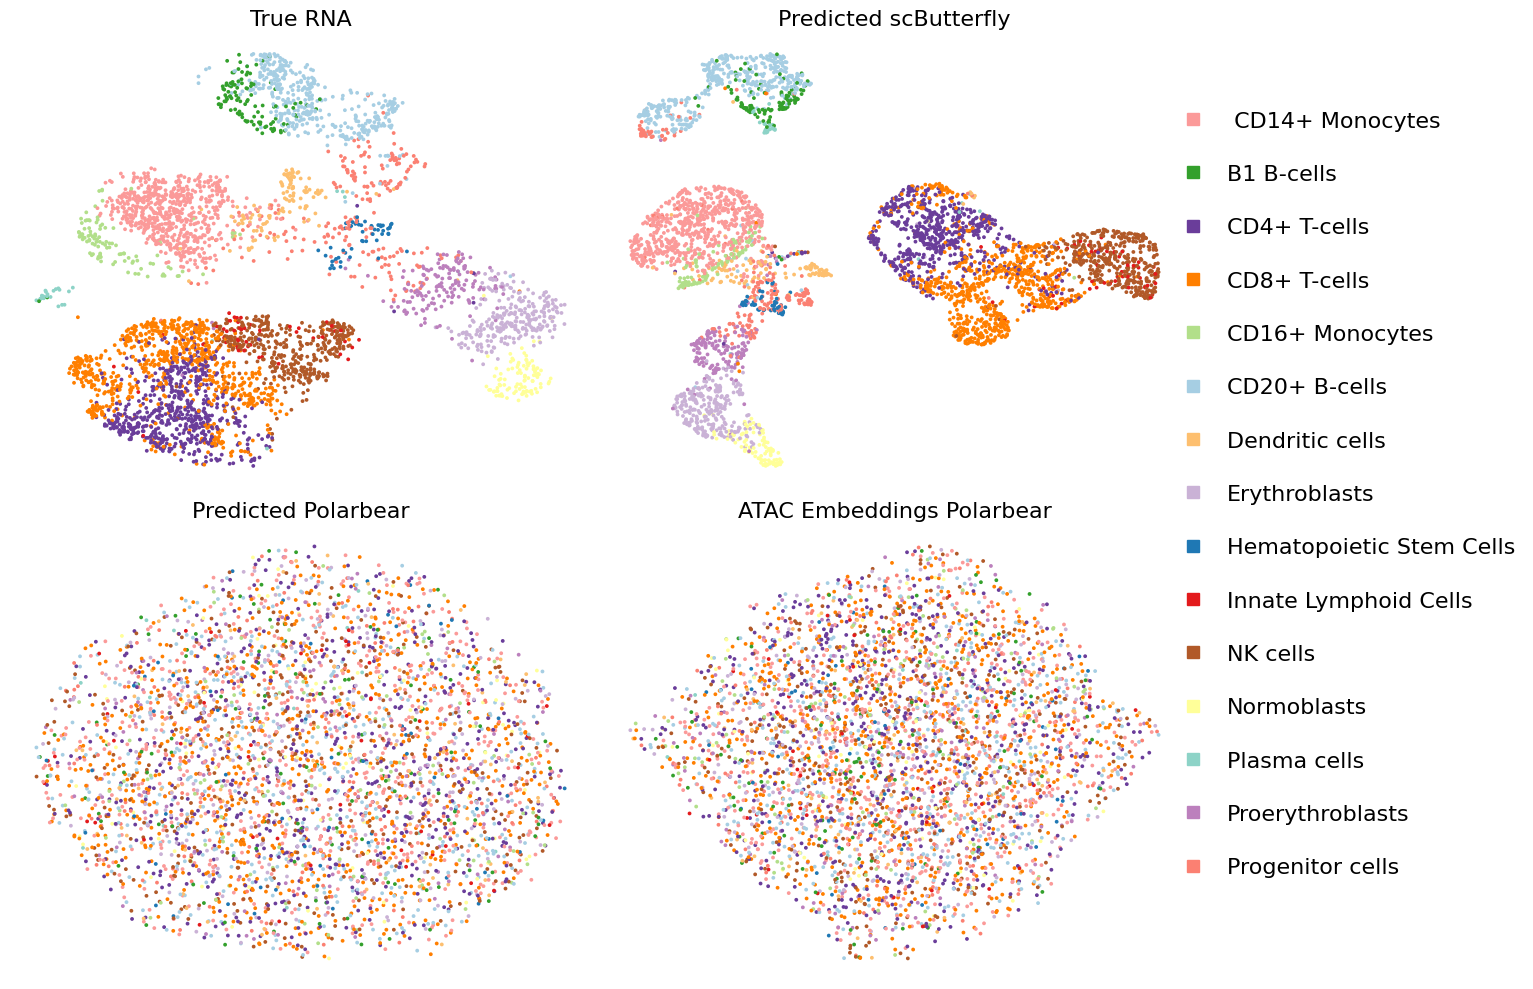

In [358]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for easier iteration
axs = axs.flatten()

# Define the palette to ensure consistency
palette = paired_colors  # as defined earlier

# Plot UMAPs on each axis
sc.pl.umap(true_RNA_bmmc_test, color='Cell Type Plot', palette=palette, ax=axs[0], show=False, frameon=False, legend_loc=None)
sc.pl.umap(pred_RNA_bmmc_sb, color='Cell Type Plot', palette=palette, ax=axs[1], show=False, frameon=False, legend_loc=None)
sc.pl.umap(pred_RNA_bmmc_polar, color='Cell Type Plot', palette=palette, ax=axs[2], show=False, frameon=False, legend_loc=None)
sc.pl.umap(pred_ATAC_polar_embed, color='Cell Type Plot', palette=palette, ax=axs[3], show=False, frameon=False, legend_loc=None)

titles = ['True RNA', 'Predicted scButterfly', 'Predicted Polarbear', 'ATAC Embeddings Polarbear']
# Turn off axis titles etc.
for ax, title in zip(axs, titles):
    ax.set_title(title, fontsize=16)
    ax.axis('off')

# Build the legend based on one AnnData object
cell_types = true_RNA_bmmc_test.obs['Cell Type Plot'].cat.categories
colors = true_RNA_bmmc_test.uns['Cell Type Plot_colors']

handles = [
    plt.Line2D([], [], marker="s", linestyle="", color=color, label=label, markersize=8)
    for label, color in zip(cell_types, colors)
]

# Add the legend at the bottom center
fig.legend(
    handles=handles,
    loc='center right',
    bbox_to_anchor=(1.1, 0.5),
    ncol=1,
    frameon=False,
    labelspacing=1.5,
    handletextpad=0.5,
    fontsize=16
)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig('/workspace/Benchmarking/figures/umap_rna_bmmc.svg', format='svg', bbox_inches='tight')
plt.show()

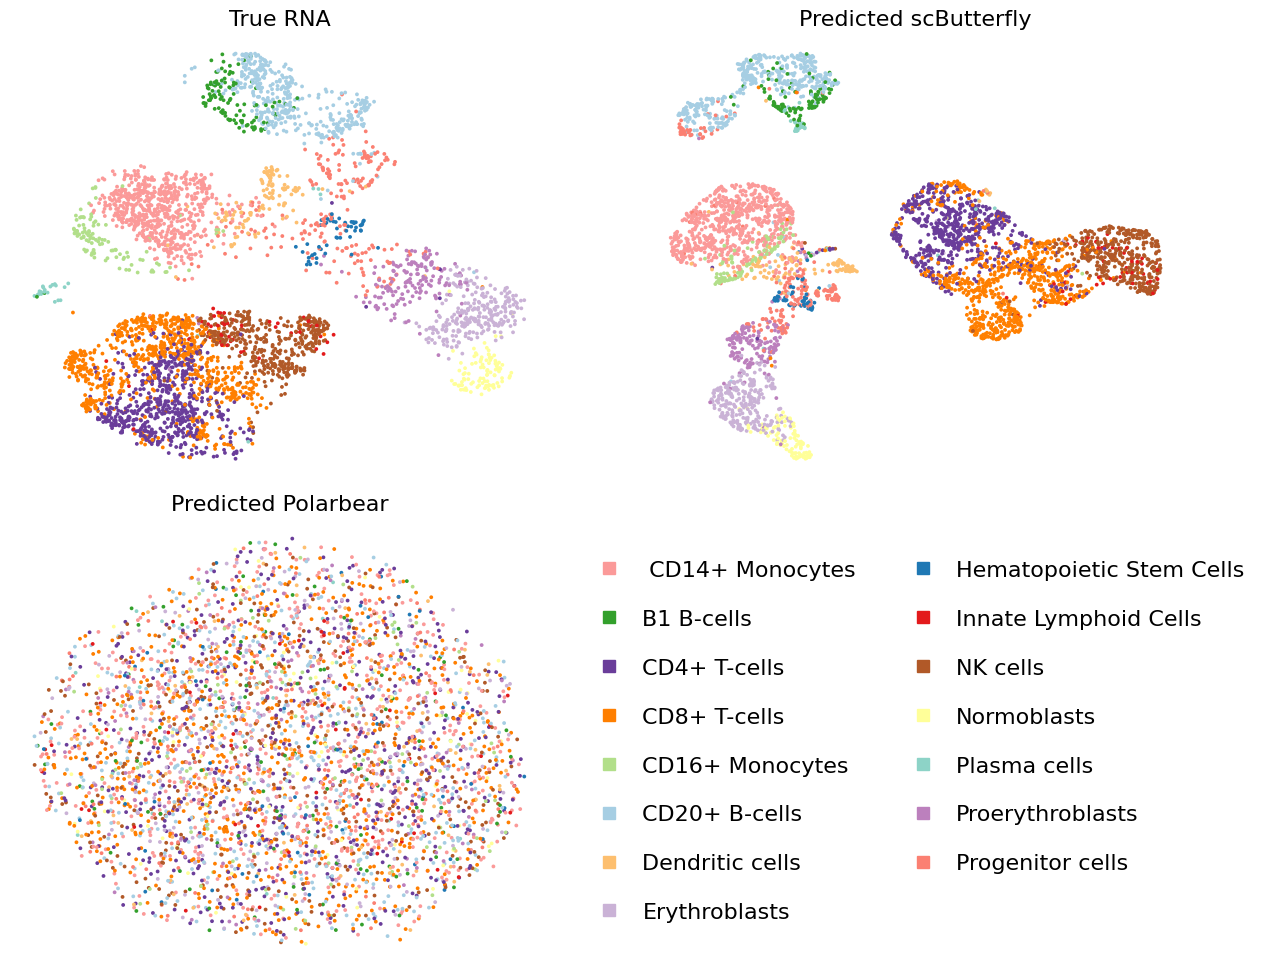

In [314]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for easier iteration
axs = axs.flatten()

# Define the palette to ensure consistency
palette = paired_colors  # as defined earlier

# Plot UMAPs on each axis
sc.pl.umap(true_RNA_bmmc_test, color='Cell Type Plot', palette=palette, ax=axs[0], show=False, frameon=False, legend_loc=None)
sc.pl.umap(pred_RNA_bmmc_sb, color='Cell Type Plot', palette=palette, ax=axs[1], show=False, frameon=False, legend_loc=None)
sc.pl.umap(pred_RNA_bmmc_polar, color='Cell Type Plot', palette=palette, ax=axs[2], show=False, frameon=False, legend_loc=None)

titles = ['True RNA', 'Predicted scButterfly', 'Predicted Polarbear']
# Turn off axis titles etc.
for ax, title in zip(axs[:3], titles):
    ax.set_title(title, fontsize=16)
    ax.axis('off')

# Build the legend based on one AnnData object
cell_types = true_RNA_bmmc_test.obs['Cell Type Plot'].cat.categories
colors = true_RNA_bmmc_test.uns['Cell Type Plot_colors']

handles = [
    plt.Line2D([], [], marker="s", linestyle="", color=color, label=label, markersize=8)
    for label, color in zip(cell_types, colors)
]

# Add the legend at the bottom center
axs[3].axis('off')
legend = axs[3].legend(
    handles=handles,
    loc='center',
    frameon=False,
    labelspacing=1.3,
    handletextpad=0.5,
    ncol=2,
    fontsize=16
)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig('/workspace/Benchmarking/figures/umap_rna_bmmc.svg', format='svg', bbox_inches='tight')
plt.show()

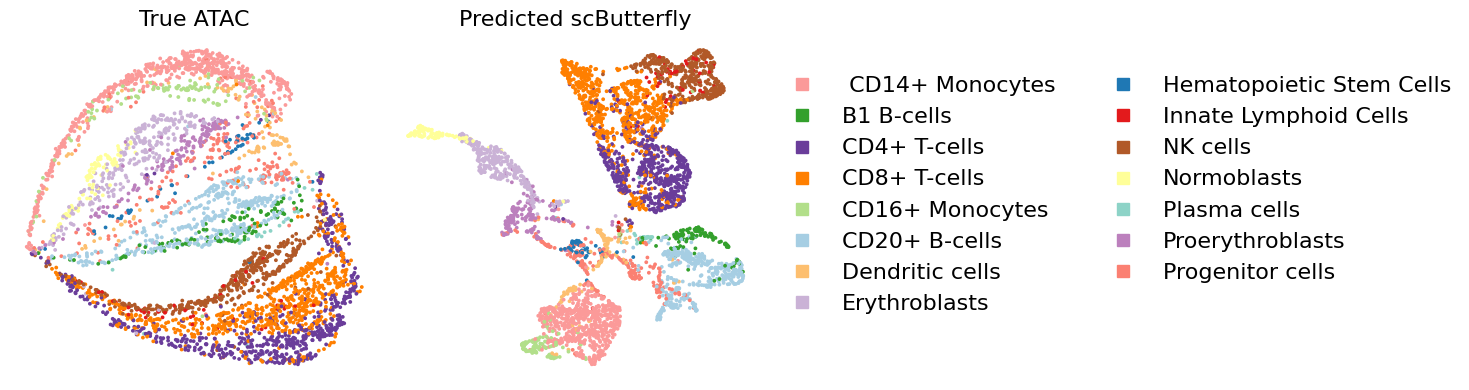

In [365]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Flatten axes for easier iteration
axs = axs.flatten()

# Define the palette to ensure consistency
palette = paired_colors  # as defined earlier

# Plot UMAPs on each axis
sc.pl.umap(true_ATAC_bmmc_test, color='Cell Type Plot', palette=palette, ax=axs[0], show=False, frameon=False, legend_loc=None)
sc.pl.umap(pred_ATAC_bmmc_sb, color='Cell Type Plot', palette=palette, ax=axs[1], show=False, frameon=False, legend_loc=None)

titles = ['True ATAC', 'Predicted scButterfly']
# Turn off axis titles etc.
for ax, title in zip(axs, titles):
    ax.set_title(title, fontsize=16)
    ax.axis('off')

# Build the legend based on one AnnData object
cell_types = true_ATAC_bmmc_test.obs['Cell Type Plot'].cat.categories
colors = true_ATAC_bmmc_test.uns['Cell Type Plot_colors']

handles = [
    plt.Line2D([], [], marker="s", linestyle="", color=color, label=label, markersize=8)
    for label, color in zip(cell_types, colors)
]
labels = list(cell_types)  # Convert categories to plain list of strings

fig.legend(
    handles=handles,
    labels=labels,
    loc='center right',
    bbox_to_anchor=(1.64, 0.5),  # you can tweak this if legend clips
    ncol=2,
    frameon=False,
    fontsize=16,
)
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig('/workspace/Benchmarking/figures/umap_atac_bmmc.svg', format='svg', bbox_inches='tight')
plt.show()

UMAPs Lymphoma

<AxesSubplot: title={'center': 'True RNA UMAP'}, xlabel='UMAP1', ylabel='UMAP2'>

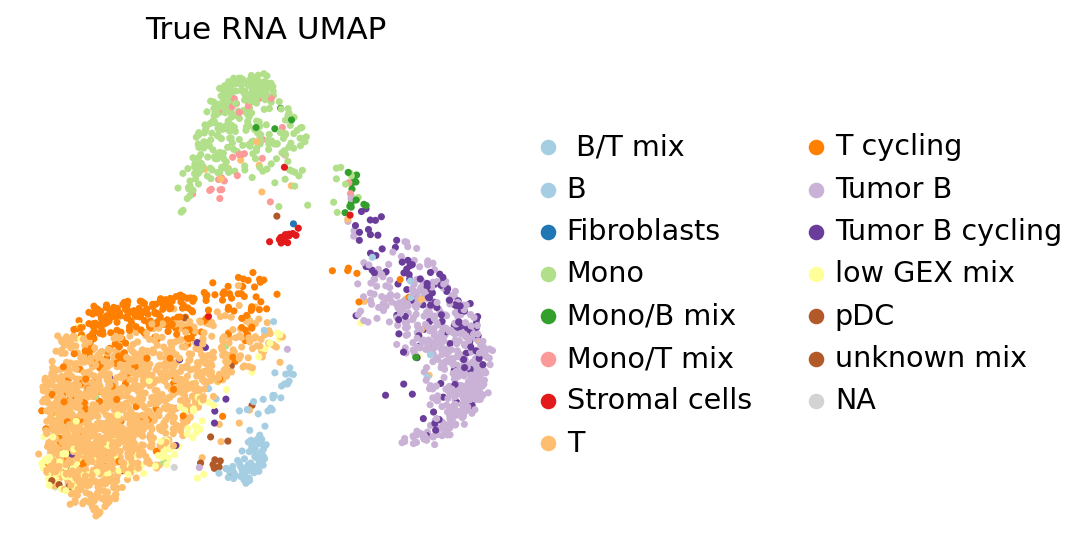

In [135]:
sc.pl.umap(true_RNA_test, color="Cell Types", frameon=False, title="True RNA UMAP", show=False, palette='Paired')

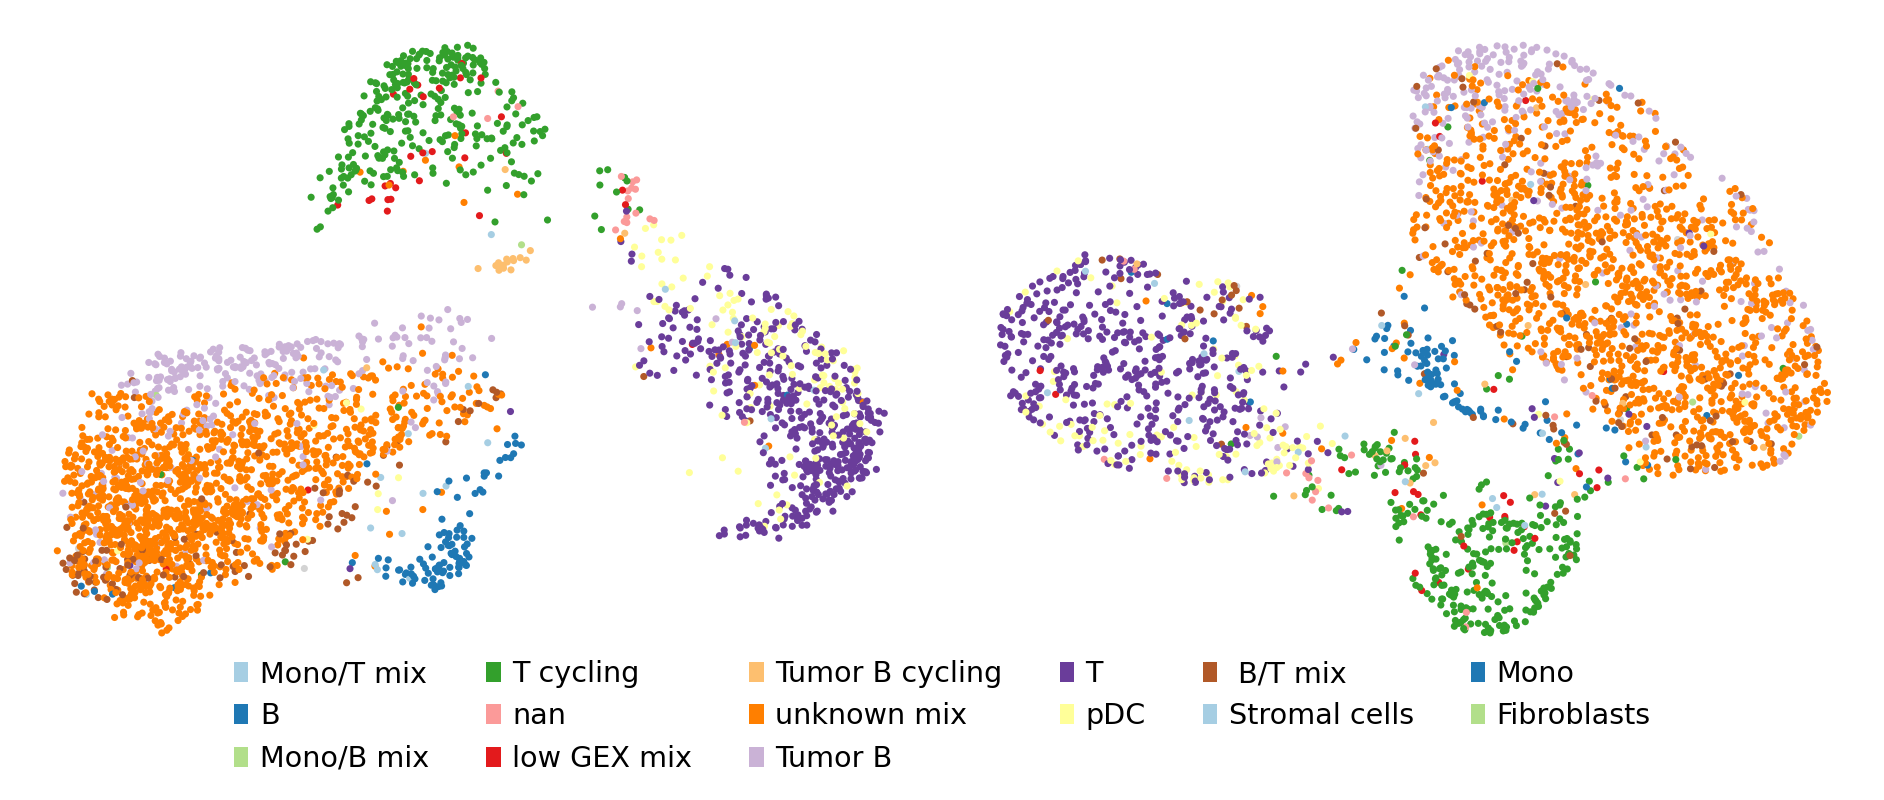

In [127]:
# First, make sure both objects have the same color mapping
# Get unique cell types from both objects
all_cell_types = set(true_RNA_test.obs['Cell Types'].unique()) | set(pred_RNA.obs['Cell Types'].unique())
all_cell_types = list(all_cell_types)

# Create consistent color palette
import seaborn as sns
colors = sns.color_palette('Paired', n_colors=len(all_cell_types))

# Assign same colors to both objects
true_RNA_test.uns['Cell Types_colors'] = colors
pred_RNA.uns['Cell Types_colors'] = colors

# Now plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sc.pl.umap(true_RNA_test, color='Cell Types', 
           ax=ax1, show=False, frameon=False, 
           legend_loc='none')

sc.pl.umap(pred_RNA, color='Cell Types', 
           ax=ax2, show=False, frameon=False,
           legend_loc='none')

ax1.set_title('')
ax2.set_title('')
ax1.axis('off')
ax2.axis('off')

# Add shared legend
handles = [plt.Rectangle((0,0),1,1, facecolor=c, edgecolor='none') 
           for c in colors]

fig.legend(handles, all_cell_types, 
           loc='lower center', 
           bbox_to_anchor=(0.5, -0.02),
           ncol=min(len(all_cell_types), 6), frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

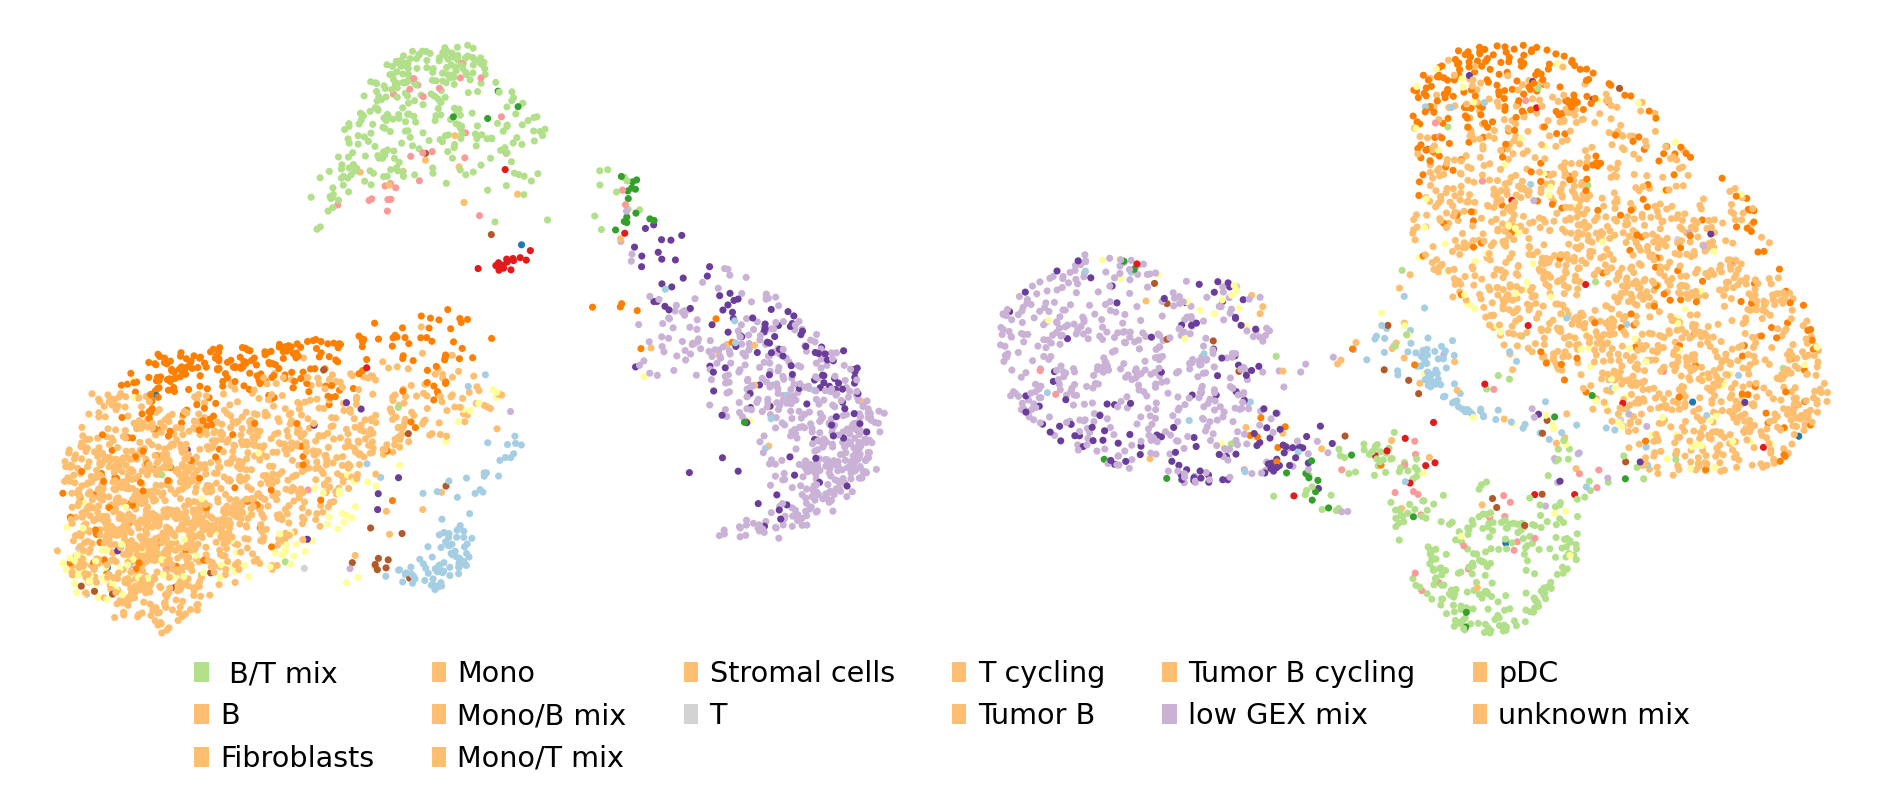

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot first UMAP
sc.pl.umap(true_RNA_test, color='Cell Types', 
           ax=ax1, show=False, frameon=False, 
           legend_loc='none', palette='Paired')

# Plot second UMAP
sc.pl.umap(pred_RNA, color='Cell Types', 
           ax=ax2, show=False, frameon=False,
           legend_loc='none', palette='Paired')

ax1.set_title('')
ax2.set_title('')
ax1.axis('off')
ax2.axis('off')

# Extract actual colors used in the plot
scatter1 = ax1.collections[0]  # Get the scatter plot collection
actual_colors = scatter1.get_facecolors()

# Get cell types and their corresponding colors
cell_types = true_RNA_test.obs['Cell Types'].values
unique_types = true_RNA_test.obs['Cell Types'].cat.categories

# Create color mapping from actual plot
color_map = {}
for i, cell_type in enumerate(cell_types):
    if cell_type not in color_map:
        color_map[cell_type] = actual_colors[i]

# Create legend with actual colors
handles = [plt.Rectangle((0,0),1,1, facecolor=color_map[ct], edgecolor='none') 
           for ct in unique_types if ct in color_map]

fig.legend(handles, unique_types, 
           loc='lower center', 
           bbox_to_anchor=(0.5, -0.02),
           ncol=min(len(unique_types), 6), frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

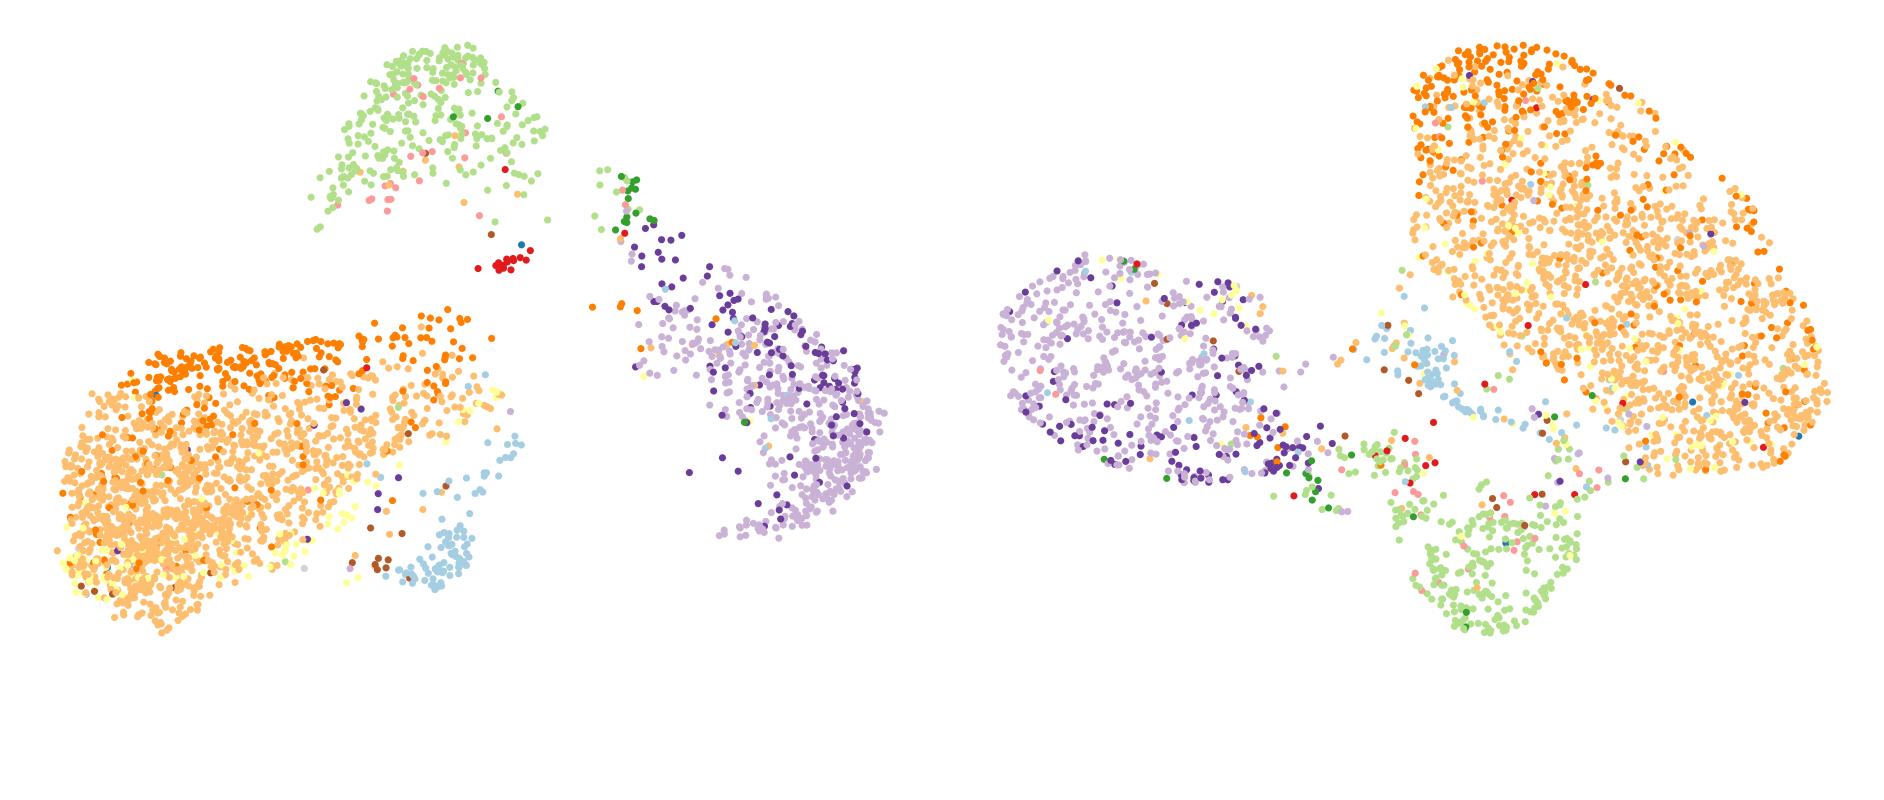

In [142]:
# Let scanpy handle colors, then move the legend
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot with legend on first plot
sc.pl.umap(true_RNA_test, color='Cell Types', 
           ax=ax1, show=False, frameon=False, 
           palette='Paired')

# Plot second without legend  
sc.pl.umap(pred_RNA, color='Cell Types', 
           ax=ax2, show=False, frameon=False,
           legend_loc='none', palette='Paired')

ax1.set_title('')
ax2.set_title('')
ax1.axis('off')
ax2.axis('off')

#Move the legend from ax1 to bottom center
legend = ax1.get_legend()
ax1.get_legend().remove()

# Recreate legend at bottom
fig.legend(legend.get_patches(), [t.get_text() for t in legend.get_texts()],
           loc='lower center', bbox_to_anchor=(0.5, -0.02),
           ncol=min(len(legend.get_texts()), 6), frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

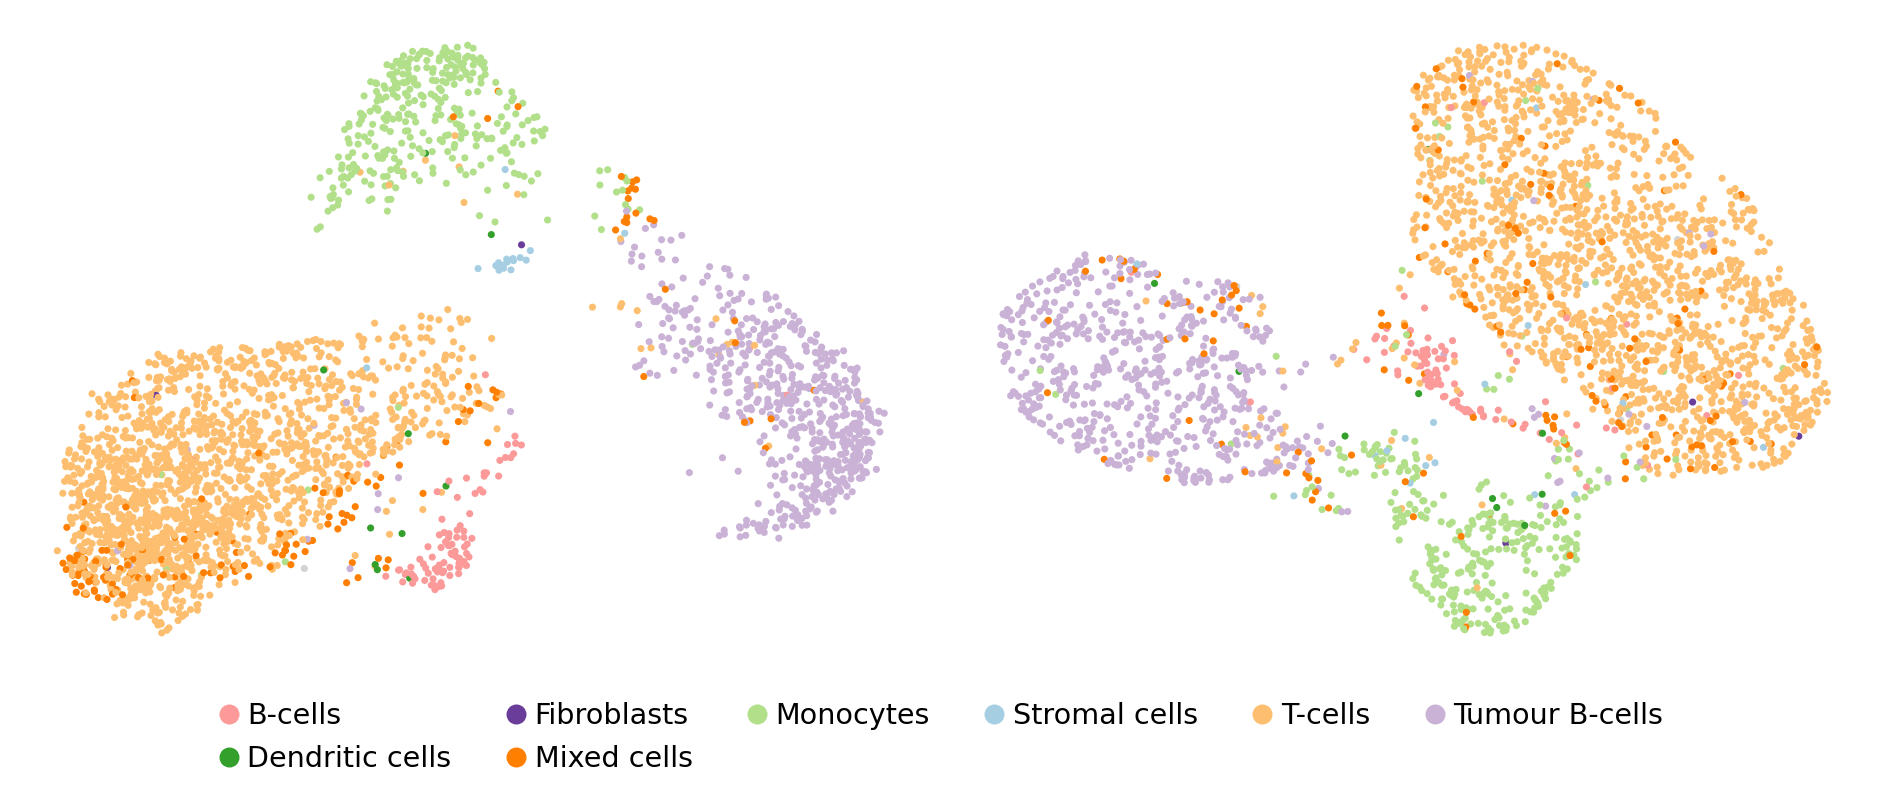

In [169]:
import matplotlib.pyplot as plt
import scanpy as sc

# Prepare plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Define the palette to ensure consistency
palette = paired_colors  # or 'Paired' like you used
# Make sure both AnnData objects have the same color map
# assuming 'Cell Types' is a categorical variable

# Plot without legend
sc.pl.umap(true_RNA_test, color='Cell Type Plot', palette=palette, ax=ax1, show=False, frameon=False, legend_loc=None)
sc.pl.umap(pred_RNA, color='Cell Type Plot', palette=palette, ax=ax2, show=False, frameon=False, legend_loc=None)

# Turn off axis titles etc.
ax1.set_title('')
ax2.set_title('')
ax1.axis('off')
ax2.axis('off')

# Manually build the legend
# Get the categories and colors from the first AnnData object
cell_types = true_RNA_test.obs['Cell Type Plot'].cat.categories
colors = true_RNA_test.uns['Cell Type Plot_colors']

# Create legend handles
handles = [plt.Line2D([], [], marker="o", linestyle="", color=color, label=label, markersize=8)
           for label, color in zip(cell_types, colors)]

# Add the legend at the bottom center
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.02),
           ncol=min(len(handles), 6), frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

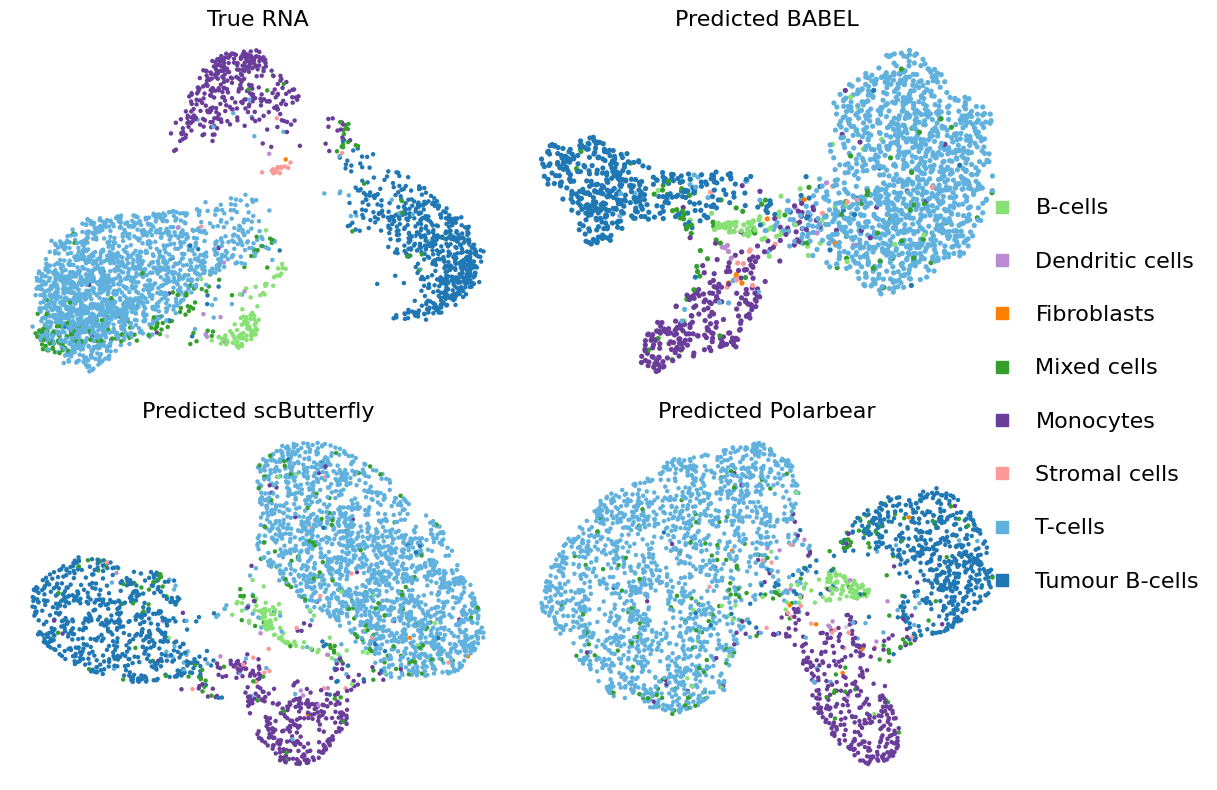

In [509]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scanpy as sc
# Prepare plots: 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes for easier iteration
axs = axs.flatten()

# Define the palette to ensure consistency
palette = paired_colors  # as defined earlier

# Plot UMAPs on each axis
sc.pl.umap(true_RNA_sb, color='Cell Type Plot', palette=palette, ax=axs[0], show=False, frameon=False, legend_loc=None)
sc.pl.umap(pred_RNA_babel, color='Cell Type Plot', palette=palette, ax=axs[1], show=False, frameon=False, legend_loc=None)
sc.pl.umap(pred_RNA_sb, color='Cell Type Plot', palette=palette, ax=axs[2], show=False, frameon=False, legend_loc=None)
sc.pl.umap(pred_RNA_polar, color='Cell Type Plot', palette=palette, ax=axs[3], show=False, frameon=False, legend_loc=None)

titles = ['True RNA', 'Predicted BABEL', 'Predicted scButterfly', 'Predicted Polarbear']
# Turn off axis titles etc.
for ax, title in zip(axs, titles):
    ax.set_title(title, fontsize=16, fontname='Times New Roman')
    ax.axis('off')

# Build the legend based on one AnnData object
cell_types = true_RNA_sb.obs['Cell Type Plot'].cat.categories
colors = true_RNA_sb.uns['Cell Type Plot_colors']

handles = [
    plt.Line2D([], [], marker="s", linestyle="", color=color, label=label, markersize=8)
    for label, color in zip(cell_types, colors)
]

# Add the legend at the bottom center
fig.legend(
    handles=handles,
    loc='center right',
    bbox_to_anchor=(1.02, 0.5),
    ncol=1,
    frameon=False,
    labelspacing=1.5,
    handletextpad=0.5,
    fontsize=16
)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig('/workspace/Benchmarking/figures/umap_rna_lymphoma.svg', format='svg', bbox_inches='tight')
plt.show()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

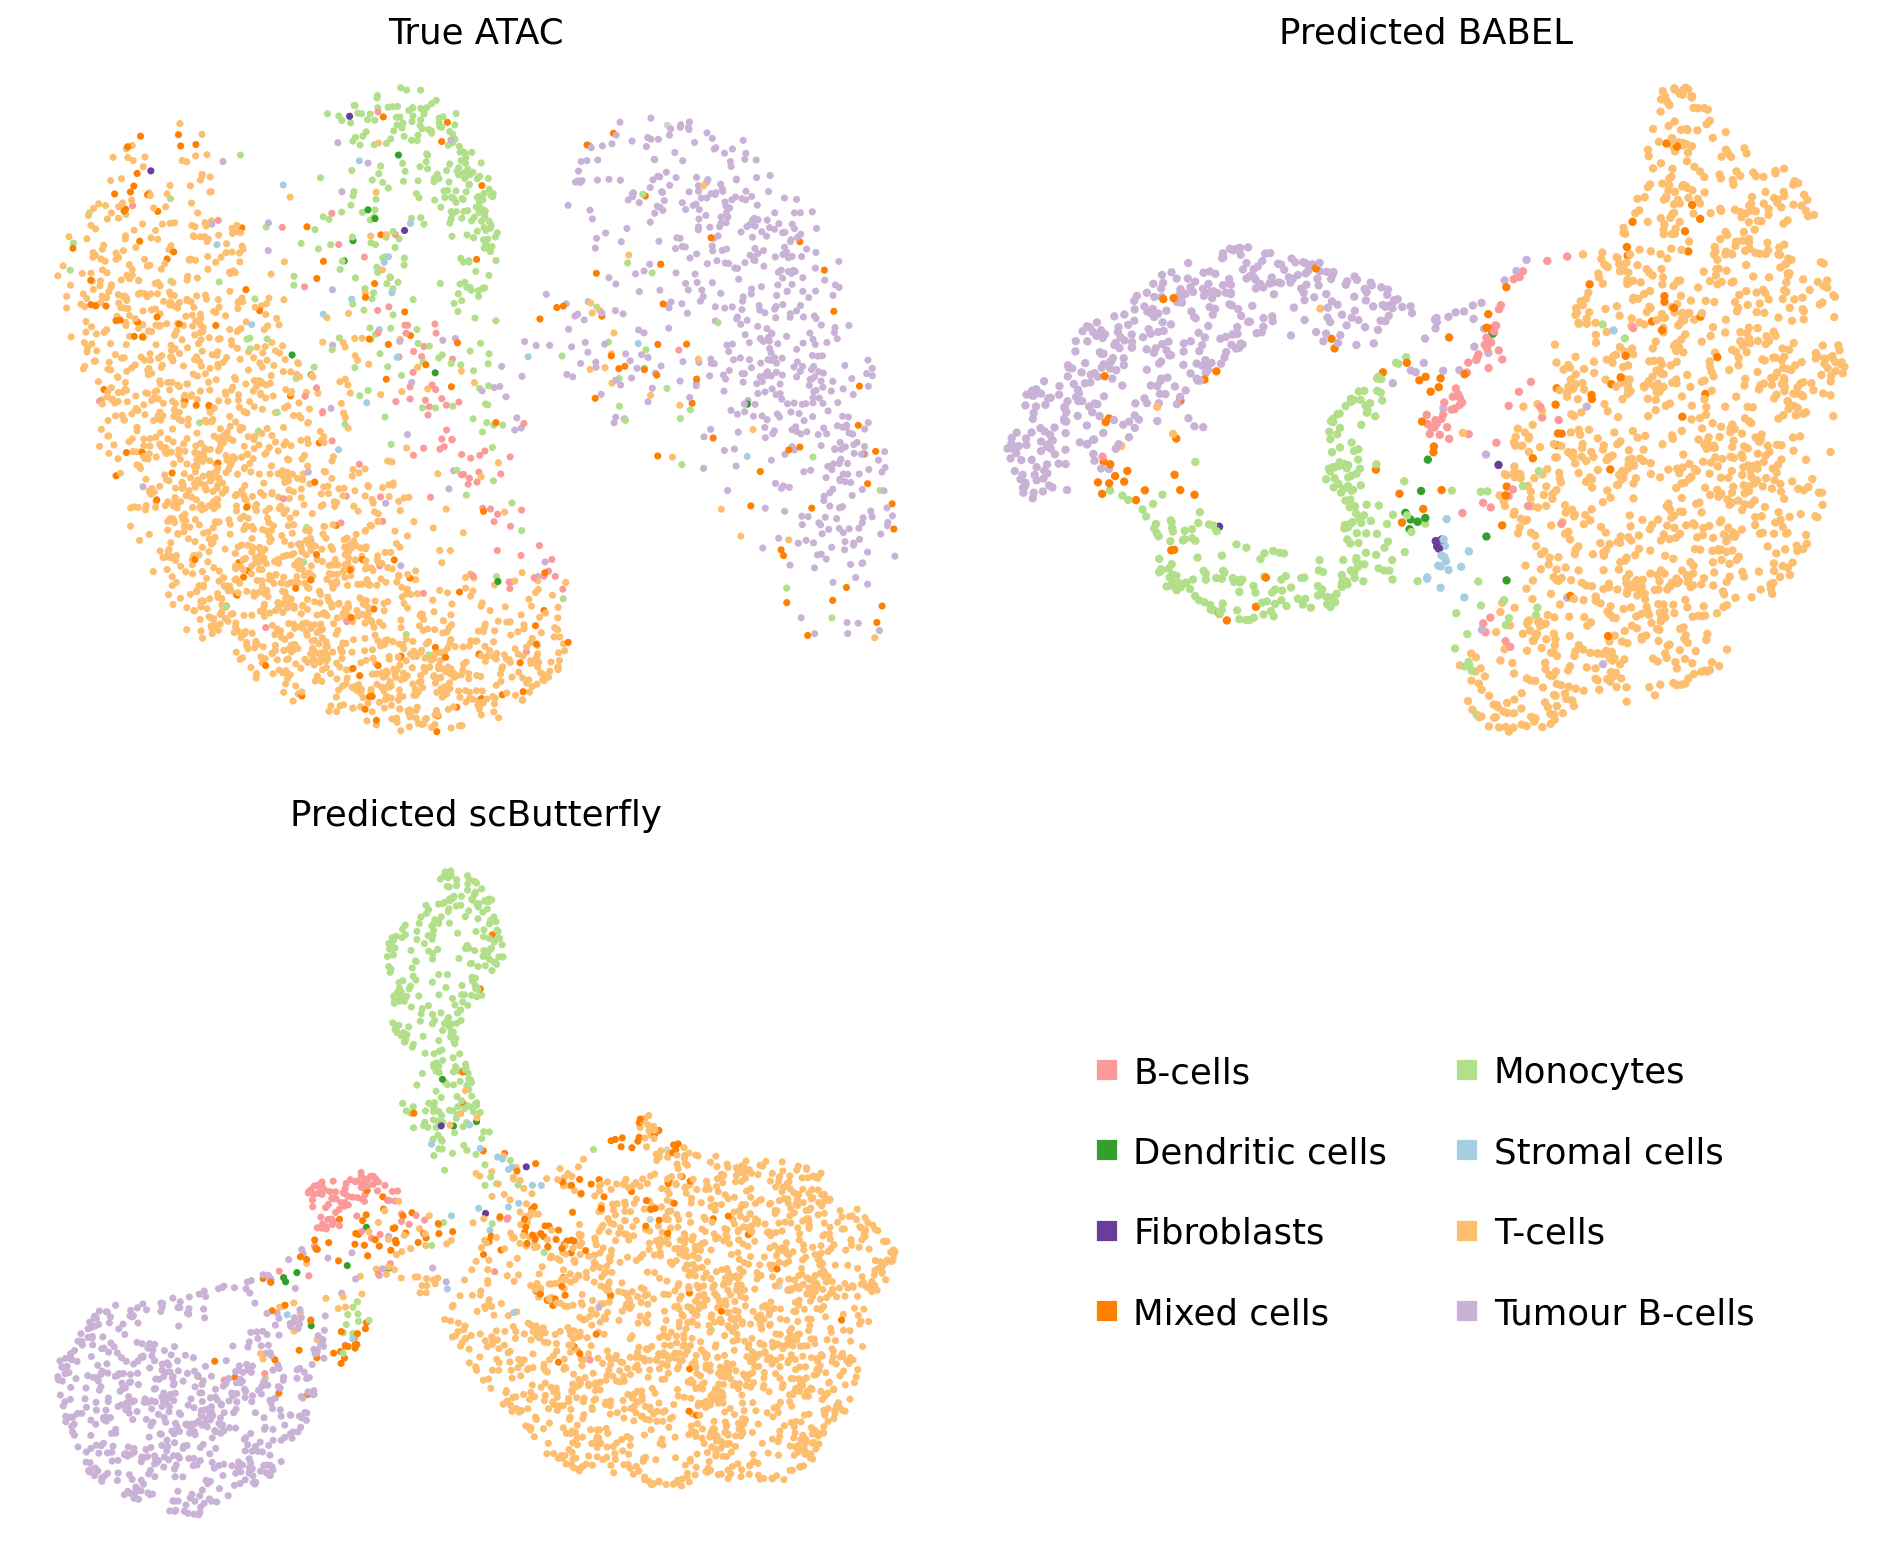

In [228]:
# Prepare plots: 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for easier iteration
axs = axs.flatten()

# Define the palette to ensure consistency
palette = paired_colors  # as defined earlier

# Plot UMAPs on each axis
sc.pl.umap(true_ATAC_sb, color='Cell Type Plot', palette=palette, ax=axs[0], show=False, frameon=False, legend_loc=None)
sc.pl.umap(pred_ATAC_babel, color='Cell Type Plot', palette=palette, ax=axs[1], show=False, frameon=False, legend_loc=None)
sc.pl.umap(pred_ATAC_sb, color='Cell Type Plot', palette=palette, ax=axs[2], show=False, frameon=False, legend_loc=None)

titles = ['True ATAC', 'Predicted BABEL', 'Predicted scButterfly']
# Turn off axis titles etc.
for ax, title in zip(axs[:3], titles):
    ax.set_title(title, fontsize=16)
    ax.axis('off')

# Build the legend based on one AnnData object
cell_types = true_RNA_test.obs['Cell Type Plot'].cat.categories
colors = true_RNA_test.uns['Cell Type Plot_colors']

handles = [
    plt.Line2D([], [], marker="s", linestyle="", color=color, label=label, markersize=8)
    for label, color in zip(cell_types, colors)
]

# Add the legend at the bottom center
axs[3].axis('off')
legend = axs[3].legend(
    handles=handles,
    loc='center',
    frameon=False,
    labelspacing=1.3,
    handletextpad=0.5,
    ncol=2,
    fontsize=16
)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig('/workspace/Benchmarking/figures/umap_atac_lymphoma.svg', format='svg', bbox_inches='tight')
plt.show()

In [366]:
os.chdir('/workspace/Benchmarking')
from metrics import *

In [374]:
run_pyscenic('/workspace/scButterfly/data/bmmc/ds_RNA_bmmc_hv.h5ad', '/workspace/Benchmarking/data_bmmc', model='scButterfly')
auc_mtx_bmmc_true = compute_auc(input_path ='/workspace/Benchmarking/data_bmmc/scButterflydata_scenic.loom', data_dir = '/workspace/Benchmarking/data_bmmc', output_file_name = 'bmmc_auc_true.loom', loom_file_name = '')


2025-06-18 12:35:14,371 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2025-06-18 12:35:15,250 - pyscenic.cli.pyscenic - INFO - Inferring regulatory networks.
2025-06-18 12:49:35,125 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/opt/venv/lib/python3.10/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nbytes = await stream.read_bytes(fmt_size)
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/venv/lib/python3.10/site-packages/distributed/worker.py", line 1214, in heartbeat
    response = await retry_operation(
  File "/opt/venv/lib/python3.10/site-packages/distributed/utils_comm.py", line 386, in retry_operation
    return await retry(
  File "/opt/venv/lib/python3.10/site-packages/distributed/utils_comm.py", line 371, in retry
    return await coro(

preparing dask client
parsing input
creating dask graph
20 partitions
computing dask graph
not shutting down client, client was created externally
finished



2025-06-18 12:49:46,863 - pyscenic.cli.pyscenic - INFO - Creating modules.

2025-06-18 12:49:47,135 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2025-06-18 12:49:48,249 - pyscenic.utils - INFO - Calculating Pearson correlations.

2025-06-18 12:49:48,364 - pyscenic.utils - WARNING - Note on correlation calculation: the default behaviour for calculating the correlations has changed after pySCENIC verion 0.9.16. Previously, the default was to calculate the correlation between a TF and target gene using only cells with non-zero expression values (mask_dropouts=True). The current default is now to use all cells to match the behavior of the R verision of SCENIC. The original settings can be retained by setting 'rho_mask_dropouts=True' in the modules_from_adjacencies function, or '--mask_dropouts' from the CLI.
	Dropout masking is currently set to [True].

2025-06-18 12:49:52,322 - pyscenic.utils - INFO - Creating modules.

2025-06-18 12:50:12,041 - pyscenic.cli.pyscenic - IN

Create regulons from a dataframe of enriched features.
Additional columns saved: []



2025-06-18 12:51:46,853 - pyscenic.cli.pyscenic - INFO - Writing results to file.
/opt/venv/lib/python3.10/site-packages/pyscenic/cli/utils.py:347: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, threshold in auc_thresholds.iteritems()


In [ ]:
auc_mtx_bmmc_true.sum() #JUNB

BACH2(+)     1066.063071
E2F5(+)       753.259220
EBF1(+)       842.278277
EGR1(+)       450.426667
EOMES(+)      730.981284
ERG(+)        822.024844
ESR1(+)       524.882917
GFI1(+)       723.979524
HMGA2(+)     1296.767407
IKZF2(+)     1234.806599
IKZF3(+)     1413.634106
JUNB(+)      2065.745333
MEIS1(+)      581.264286
NFIA(+)       753.112195
PPARG(+)      810.321221
TBP(+)        196.238261
TBX21(+)     1050.836566
TCF4(+)       884.745906
THRA(+)       234.194603
ZBTB14(+)     225.988667
ZNF26(+)       60.007778
ZNF680(+)     206.849167
ZNF793(+)     377.708070
dtype: float64

In [382]:
pred_RNA_bmmc_polar.obs['Cell Types'] = pred_RNA_bmmc_polar.obs['cell_type']

In [ ]:
auc_mtx_bmmc_polar = compute_auc('/workspace/Benchmarking/data_bmmc/bmmc_polar.h5ad', '/workspace/Benchmarking/data_bmmc', 'scButterflydata_scenic_pred.loom', 'auc_sb_pred.loom')


2025-06-18 13:07:06,350 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2025-06-18 13:07:08,143 - pyscenic.cli.pyscenic - INFO - Loading gene signatures.

2025-06-18 13:07:08,240 - pyscenic.cli.pyscenic - INFO - Calculating cellular enrichment.


Create regulons from a dataframe of enriched features.
Additional columns saved: []



2025-06-18 13:07:20,904 - pyscenic.cli.pyscenic - INFO - Writing results to file.
/opt/venv/lib/python3.10/site-packages/pyscenic/cli/utils.py:347: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, threshold in auc_thresholds.iteritems()


In [ ]:
auc_mtx_bmmc_polar.sum() #BACH2

BACH2(+)     146.474694
E2F5(+)      118.692695
EBF1(+)      114.597000
EGR1(+)       62.472619
EOMES(+)      78.889969
ERG(+)        98.420342
ESR1(+)       96.601190
GFI1(+)       18.347364
HMGA2(+)       3.704861
IKZF2(+)     133.578914
IKZF3(+)     105.078665
JUNB(+)       68.311806
MEIS1(+)     101.699936
NFIA(+)      107.966861
PPARG(+)      94.393905
TBP(+)        49.476385
TBX21(+)     101.034542
TCF4(+)      142.364061
THRA(+)       51.216270
ZBTB14(+)     36.266964
ZNF26(+)     126.071429
ZNF680(+)     19.330543
ZNF793(+)     76.158939
dtype: float64

In [401]:
auc_mtx_bmmc_sb = compute_auc('/workspace/Benchmarking/data_bmmc/bmmc_sb.h5ad', '/workspace/Benchmarking/data_bmmc', 'Polardata_scenic_pred.loom', 'auc_polar_pred.loom')


2025-06-18 13:18:55,992 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2025-06-18 13:18:56,347 - pyscenic.cli.pyscenic - INFO - Loading gene signatures.

2025-06-18 13:18:56,446 - pyscenic.cli.pyscenic - INFO - Calculating cellular enrichment.


Create regulons from a dataframe of enriched features.
Additional columns saved: []



2025-06-18 13:19:02,280 - pyscenic.cli.pyscenic - INFO - Writing results to file.
/opt/venv/lib/python3.10/site-packages/pyscenic/cli/utils.py:347: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, threshold in auc_thresholds.iteritems()


In [403]:
auc_mtx_bmmc_sb.sum() #BACH2

BACH2(+)      92.043296
E2F5(+)       84.364172
EBF1(+)      122.238052
EGR1(+)       92.810667
EOMES(+)      99.821284
ERG(+)       117.963956
ESR1(+)       20.492917
GFI1(+)       12.069048
HMGA2(+)      47.160741
IKZF2(+)     150.945387
IKZF3(+)      91.429785
JUNB(+)      140.968889
MEIS1(+)     458.016667
NFIA(+)      112.794697
PPARG(+)     107.071831
TBP(+)        73.989855
TBX21(+)      49.289495
TCF4(+)      103.370058
THRA(+)       38.348889
ZBTB14(+)     93.690444
ZNF26(+)     134.014444
ZNF680(+)      9.558333
ZNF793(+)     69.212398
dtype: float64

In [404]:
polar_bmmc = compute_grcs(auc_mtx_bmmc_true, auc_mtx_bmmc_polar)
sb_bmmc = compute_grcs(auc_mtx_bmmc_true, auc_mtx_bmmc_sb)


In [444]:
sb_bmmc

(-0.04681677613569477,
 {'BACH2(+)': -0.04977033553319257,
  'E2F5(+)': -0.49814426158567787,
  'EBF1(+)': -0.0022937897321919313,
  'EGR1(+)': 0.10230764110574547,
  'EOMES(+)': -0.4749814586392356,
  'ERG(+)': -0.24572445603306628,
  'ESR1(+)': -0.1611017618650053,
  'GFI1(+)': -0.18132886579039298,
  'HMGA2(+)': 0.8311311084052654,
  'IKZF2(+)': 0.2098118087973626,
  'IKZF3(+)': -0.14279673719450356,
  'JUNB(+)': 0.10255414530169456,
  'MEIS1(+)': -0.19322595595500144,
  'NFIA(+)': 0.13816891337362106,
  'PPARG(+)': -0.0042501025678788225,
  'TBP(+)': -0.0703897539233088,
  'TBX21(+)': 0.42660866878994763,
  'TCF4(+)': -0.36256294655434956,
  'THRA(+)': -0.15975719185151774,
  'ZBTB14(+)': -0.12588805689131569,
  'ZNF26(+)': 0.0021342593582109916,
  'ZNF680(+)': 0.009406187474305047,
  'ZNF793(+)': -0.22669290961049438})

In [419]:
polar_bmmc

(0.00657026009827027,
 {'BACH2(+)': 0.006056513777956927,
  'E2F5(+)': 0.004979151234979636,
  'EBF1(+)': 0.005885031537585266,
  'EGR1(+)': -0.015299513386560486,
  'EOMES(+)': -0.010036854099866174,
  'ERG(+)': 0.0004619321696785589,
  'ESR1(+)': 0.001888630691074693,
  'GFI1(+)': 0.03955318399026677,
  'HMGA2(+)': -0.022445926605035294,
  'IKZF2(+)': 0.016816861223114432,
  'IKZF3(+)': 0.01568705496044826,
  'JUNB(+)': 0.011696177939779093,
  'MEIS1(+)': 0.010588215257213821,
  'NFIA(+)': 0.005321118416813708,
  'PPARG(+)': 0.009445770115362209,
  'TBP(+)': 0.022174287991258465,
  'TBX21(+)': 0.01198938359472933,
  'TCF4(+)': 0.011053468550413009,
  'THRA(+)': 0.020347642209127773,
  'ZBTB14(+)': -0.013317716734896594,
  'ZNF26(+)': -0.007273054783948633,
  'ZNF680(+)': 0.0061309919815185025,
  'ZNF793(+)': 0.019413632229202938})

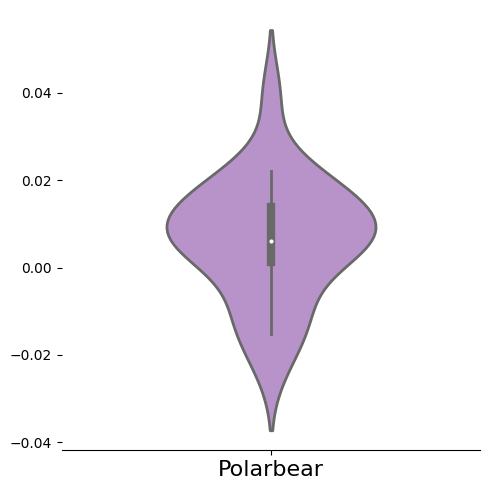

In [423]:
violon_df_bmmc = pd.DataFrame({
    #'scButterfly': list(sb_bmmc[1].values()),
    'Polarbear': list(polar_bmmc[1].values())
})

paired_colors = [ 
    "#ba8ad3",  # light purple/Tumour B cells
    '#ff7f00',  # orange/Mixed
    '#33a02c',  # green/dendritic
    '#6a3d9a',  # purple/ Fibroblasts
    '#fb9a99',  # light red/B cells
    "#60b1dd",  # light blue/Stromal
    '#1f78b4',  # blue
    '#e31a1c',  # red
    '#b15928',  # brown
    "#ef973f",
]

fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=violon_df_bmmc, palette=paired_colors, linewidth=2, ax=ax, fontsize=16, width=0.5, scale='area')

# Remove the box around the plot (hide the spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Optionally, keep only the left and bottom spines visible
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.tick_params(axis='x', labelsize=16)

# Show the plot
plt.tight_layout()
plt.savefig('/workspace/Benchmarking/figures/violin_grcs_bmmc2.svg', format='svg', bbox_inches='tight')
plt.show()

In [41]:
lf = lp.connect('data_all/babel_auc_true.loom', mode='r+', validate=False )
auc_mtx_true_babel = pd.DataFrame(lf.ca.RegulonsAUC, index=lf.ca.CellID)
lf.close()

lf = lp.connect('data_all/auc_babel_pred.loom', mode='r+', validate=False )
auc_mtx_pred_babel = pd.DataFrame(lf.ca.RegulonsAUC, index=lf.ca.CellID)
lf.close()

In [42]:
babel = compute_grcs(auc_mtx_true_babel, auc_mtx_pred_babel)

In [43]:
lf = lp.connect('data_scbutterfly/lymphoma_auc_true.loom', mode='r+', validate=False )
auc_mtx_true_sb = pd.DataFrame(lf.ca.RegulonsAUC, index=lf.ca.CellID)
lf.close()

lf = lp.connect('data_scbutterfly/auc_pred.loom', mode='r+', validate=False )
auc_mtx_pred_sb = pd.DataFrame(lf.ca.RegulonsAUC, index=lf.ca.CellID)
lf.close()

In [44]:
auc_mtx_pred_sb

EBF1(+)  EGR1(+)  FOS(+)  GATA5(+)  HDX(+)  HNF4G(+)  \
GTTCCCAGTTAGCATG-1      0.0      0.0     0.0  0.035556     0.0  0.035882   
CCTGTATGTTTATGGG-1      0.0      0.0     0.0  0.000000     0.0  0.002941   
AGAAACCCAATCTCTC-1      0.0      0.0     0.0  0.035556     0.0  0.027451   
CAAATCATCACACAGT-1      0.0      0.0     0.0  0.000000     0.0  0.027059   
GTGAGGAGTCTTACTA-1      0.0      0.0     0.0  0.396296     0.0  0.020980   
...                     ...      ...     ...       ...     ...       ...   
TAACCAGGTCAAAGGG-1      0.0      0.0     0.0  0.000000     0.0  0.015294   
TGTTGTGCAGGCCAAA-1      0.0      0.0     0.0  0.008889     0.0  0.028235   
GAAGGCCCATGTCAAT-1      0.0      0.0     0.0  0.000000     0.0  0.056667   
ATGATGGAGCACTAGT-1      0.0      0.0     0.0  0.374074     0.0  0.010588   
TAAGGACCAGTTATCG-1      0.0      0.0     0.0  0.369630     0.0  0.000000   

                    IKZF2(+)  IRF5(+)  JUN(+)  LMX1A(+)  ...   OTX1(+)  \
GTTCCCAGTTAGCATG-1       0.0      0.0     0.0       0.0  ...  0.000000   
CCTGTATGTTTATGGG-1       0.0      0.0     0.0       0.0  ...  0.000000   
AGAAACCCAATCTCTC-1       0.0      0.0     0.0       0.0  ...  0.031852   
CAAATCATCACACAGT-1       0.0      0.0     0.0       0.0  ...  0.000000   
GTGAGGAGTCTTACTA-1       0.0      0.0     0.0       0.0  ...  0.045926   
...                      ...      ...     ...       ...  ...       ...   
TAACCAGGTCAAAGGG-1       0.0      0.0     0.0       0.0  ...  0.000000   
TGTTGTGCAGGCCAAA-1       0.0      0.0     0.0       0.0  ...  0.000000   
GAAGGCCCATGTCAAT-1       0.0      0.0     0.0       0.0  ...  0.109259   
ATGATGGAGCACTAGT-1       0.0      0.0     0.0       0.0  ...  0.049259   
TAAGGACCAGTTATCG-1       0.0      0.0     0.0       0.0  ...  0.050741   

                    PAX6(+)  POU2F3(+)   RFX5(+)  RXRA(+)  SIX4(+)  TBX21(+)  \
GTTCCCAGTTAGCATG-1      0.0   0.025965  0.000000      0.0      0.0  0.000000   
CCTGTATGTTTATGGG-1      0.0   0.022105  0.001644      0.0      0.0  0.000000   
AGAAACCCAATCTCTC-1      0.0   0.017193  0.006301      0.0      0.0  0.074167   
CAAATCATCACACAGT-1      0.0   0.020351  0.000000      0.0      0.0  0.000000   
GTGAGGAGTCTTACTA-1      0.0   0.057895  0.000000      0.0      0.0  0.055833   
...                     ...        ...       ...      ...      ...       ...   
TAACCAGGTCAAAGGG-1      0.0   0.023509  0.006027      0.0      0.0  0.000000   
TGTTGTGCAGGCCAAA-1      0.0   0.016842  0.000000      0.0      0.0  0.000000   
GAAGGCCCATGTCAAT-1      0.0   0.058246  0.058174      0.0      0.0  0.000000   
ATGATGGAGCACTAGT-1      0.0   0.069474  0.000000      0.0      0.0  0.000000   
TAAGGACCAGTTATCG-1      0.0   0.051228  0.020183      0.0      0.0  0.045833   

                    TCF7L2(+)  ZNF274(+)  ZNF695(+)  
GTTCCCAGTTAGCATG-1        0.0   0.000000        0.0  
CCTGTATGTTTATGGG-1        0.0   0.000000        0.0  
AGAAACCCAATCTCTC-1        0.0   0.000000        0.0  
CAAATCATCACACAGT-1        0.0   0.000000        0.0  
GTGAGGAGTCTTACTA-1        0.0   0.000000        0.0  
...                       ...        ...        ...  
TAACCAGGTCAAAGGG-1        0.0   0.000000        0.0  
TGTTGTGCAGGCCAAA-1        0.0   0.000000        0.0  
GAAGGCCCATGTCAAT-1        0.0   0.000000        0.0  
ATGATGGAGCACTAGT-1        0.0   0.000000        0.0  
TAAGGACCAGTTATCG-1        0.0   0.072222        0.0  

[2929 rows x 21 columns]

In [45]:
auc_mtx_true_sb

EBF1(+)   EGR1(+)    FOS(+)  GATA5(+)    HDX(+)  \
AAACAGCCAGAACCGA-1  0.136937  0.025294  0.017879  0.149697  0.268333   
AAACAGCCAGCCTAAC-1  0.045045  0.006275  0.042071  0.145455  0.000000   
AAACAGCCATATTGAC-1  0.040961  0.052353  0.026010  0.224848  0.000000   
AAACATGCAAATTCGT-1  0.050631  0.040196  0.018030  0.086061  0.000000   
AAACATGCAACCTAAT-1  0.071952  0.028627  0.201111  0.438788  0.345000   
...                      ...       ...       ...       ...       ...   
TTTGTTGGTATGGTGC-1  0.028288  0.056275  0.038434  0.000000  0.000000   
TTTGTTGGTCAATACG-1  0.035676  0.019020  0.015303  0.069091  0.000000   
TTTGTTGGTCAGGAAG-1  0.013694  0.007647  0.024242  0.087273  0.000000   
TTTGTTGGTTCAAGAT-1  0.061381  0.006275  0.044242  0.087879  0.000000   
TTTGTTGGTTTACTTG-1  0.015075  0.016471  0.042980  0.027273  0.000000   

                    HNF4G(+)  IKZF2(+)  IRF5(+)    JUN(+)  LMX1A(+)  ...  \
AAACAGCCAGAACCGA-1  0.082883  0.118667  0.00000  0.052381  0.000000  ...   
AAACAGCCAGCCTAAC-1  0.101261  0.271333  0.00000  0.082540  0.000000  ...   
AAACAGCCATATTGAC-1  0.048108  0.099333  0.00000  0.040000  0.000000  ...   
AAACATGCAAATTCGT-1  0.037838  0.000000  0.00000  0.003175  0.033333  ...   
AAACATGCAACCTAAT-1  0.000000  0.021333  0.00000  0.009206  0.000000  ...   
...                      ...       ...      ...       ...       ...  ...   
TTTGTTGGTATGGTGC-1  0.067387  0.000000  0.00000  0.061587  0.000000  ...   
TTTGTTGGTCAATACG-1  0.040360  0.046667  0.07619  0.034286  0.000000  ...   
TTTGTTGGTCAGGAAG-1  0.070090  0.000000  0.00000  0.042222  0.000000  ...   
TTTGTTGGTTCAAGAT-1  0.088649  0.000000  0.00000  0.084127  0.062667  ...   
TTTGTTGGTTTACTTG-1  0.035495  0.000000  0.00000  0.073651  0.051556  ...   

                     OTX1(+)   PAX6(+)  POU2F3(+)   RFX5(+)   RXRA(+)  \
AAACAGCCAGAACCGA-1  0.140000  0.080833   0.078485  0.108333  0.019024   
AAACAGCCAGCCTAAC-1  0.000000  0.003333   0.052121  0.008258  0.000000   
AAACAGCCATATTGAC-1  0.036190  0.000000   0.019091  0.038788  0.051382   
AAACATGCAAATTCGT-1  0.068571  0.000000   0.029091  0.042803  0.000000   
AAACATGCAACCTAAT-1  0.039683  0.000000   0.044545  0.017652  0.150894   
...                      ...       ...        ...       ...       ...   
TTTGTTGGTATGGTGC-1  0.109841  0.000000   0.036364  0.053485  0.000000   
TTTGTTGGTCAATACG-1  0.035873  0.000000   0.074545  0.045227  0.000000   
TTTGTTGGTCAGGAAG-1  0.000000  0.009167   0.013939  0.028182  0.041463   
TTTGTTGGTTCAAGAT-1  0.000000  0.002500   0.011818  0.017121  0.000000   
TTTGTTGGTTTACTTG-1  0.000000  0.126667   0.001818  0.043864  0.025528   

                     SIX4(+)  TBX21(+)  TCF7L2(+)  ZNF274(+)  ZNF695(+)  
AAACAGCCAGAACCGA-1  0.054444  0.028000   0.022353   0.093333   0.000000  
AAACAGCCAGCCTAAC-1  0.000000  0.104000   0.042288   0.120000   0.107576  
AAACAGCCATATTGAC-1  0.000000  0.138667   0.048889   0.140952   0.000000  
AAACATGCAAATTCGT-1  0.000000  0.044000   0.004248   0.000000   0.027273  
AAACATGCAACCTAAT-1  0.032222  0.000000   0.181438   0.052381   0.000000  
...                      ...       ...        ...        ...        ...  
TTTGTTGGTATGGTGC-1  0.039630  0.001333   0.048301   0.000000   0.016061  
TTTGTTGGTCAATACG-1  0.030741  0.000000   0.025098   0.000000   0.000000  
TTTGTTGGTCAGGAAG-1  0.000000  0.016667   0.024444   0.137143   0.030000  
TTTGTTGGTTCAAGAT-1  0.000000  0.012000   0.043072   0.000000   0.068788  
TTTGTTGGTTTACTTG-1  0.021111  0.000000   0.024118   0.068571   0.000000  

[14645 rows x 21 columns]

In [46]:
sb = compute_grcs(auc_mtx_true_babel, auc_mtx_pred_sb)

In [47]:
sb

(0.1499348263059489,
 {'EBF1(+)': 0,
  'FOS(+)': 0,
  'GATA5(+)': 0.7034671309224668,
  'HDX(+)': 0,
  'HNF4G(+)': 0.32521231081043794,
  'IKZF2(+)': 0,
  'JUN(+)': 0,
  'LMX1A(+)': 0,
  'NANOG(+)': 0,
  'OTX1(+)': 0.7809400283763881,
  'PAX6(+)': 0,
  'RFX5(+)': 0.4394029244799406,
  'RXRA(+)': 0,
  'SIX4(+)': 0,
  'TCF7L2(+)': 0})

In [48]:
babel

(0.4543889003564583,
 {'EBF1(+)': 0.6845814491666116,
  'FOS(+)': 0.7702325794193836,
  'GATA5(+)': 0.6497901314353245,
  'HDX(+)': 0.4583874807437916,
  'HNF4G(+)': 0.140060538766989,
  'IKZF2(+)': 0.254176134438065,
  'JUN(+)': 0.29082856947794417,
  'LMX1A(+)': 0.021675952631581133,
  'NANOG(+)': 0.49547859450033893,
  'OTX1(+)': 0.7386703270846021,
  'PAX6(+)': 0.5155501886109075,
  'RFX5(+)': 0.21987520473908528,
  'RXRA(+)': 0.784439150931652,
  'SIX4(+)': -0.0010727837671110085,
  'TCF7L2(+)': 0.793159987167709})

In [49]:
auc_mtx_polar = compute_auc(input_path ='/workspace/Benchmarking/data_all/polar_pred.h5ad', data_dir ='/workspace/Benchmarking/data_all', output_file_name ='polar_auc_pred.loom', loom_file_name = 'ploar_pred.loom')

/opt/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

2025-06-16 20:17:05,303 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2025-06-16 20:17:08,651 - pyscenic.cli.pyscenic - INFO - Loading gene signatures.

2025-06-16 20:17:08,703 - pyscenic.cli.pyscenic - INFO - Calculating cellular enrichment.


Create regulons from a dataframe of enriched features.
Additional columns saved: []



2025-06-16 20:17:29,163 - pyscenic.cli.pyscenic - INFO - Writing results to file.
/opt/venv/lib/python3.10/site-packages/pyscenic/cli/utils.py:347: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, threshold in auc_thresholds.iteritems()


In [50]:
auc_mtx_polar

EBF1(+)    FOS(+)  GATA5(+)    HDX(+)  HNF4G(+)  \
TGCTCAACAGTTTGGC-1  0.068698  0.121354  0.259762  0.063661  0.014617   
GATTCAGGTGTTGCTT-1  0.070520  0.144758  0.325931  0.074727  0.021648   
GCAAACCGTTGTTGTC-1  0.039793  0.018716  0.064232  0.000546  0.018097   
CTCCAACTCGTTAACA-1  0.031848  0.014763  0.064133  0.000000  0.012887   
CAGCATTAGGAAGCTA-1  0.027743  0.015215  0.065623  0.000000  0.011111   
...                      ...       ...       ...       ...       ...   
CGAAGAATCACGCCAA-1  0.031519  0.024693  0.066319  0.000000  0.007368   
CAAAGGATCTGTGCCT-1  0.064593  0.169407  0.388624  0.094262  0.024007   
CTTTAGTTCCTAGTAA-1  0.024345  0.016291  0.058073  0.000000  0.005710   
AGTTTGATCGAGGAAC-1  0.026180  0.013576  0.119026  0.000000  0.002632   
TAATGGACAAAGCGCA-1  0.078450  0.071858  0.188376  0.083402  0.027860   

                    IKZF2(+)    JUN(+)  LMX1A(+)  NANOG(+)   OTX1(+)  \
TGCTCAACAGTTTGGC-1  0.029452  0.000000       0.0  0.000729  0.072057   
GATTCAGGTGTTGCTT-1  0.018887  0.000000       0.0  0.034426  0.071858   
GCAAACCGTTGTTGTC-1  0.032325  0.044991       0.0  0.000000  0.058793   
CTCCAACTCGTTAACA-1  0.028457  0.000304       0.0  0.000000  0.040959   
CAGCATTAGGAAGCTA-1  0.028177  0.006740       0.0  0.000000  0.031346   
...                      ...       ...       ...       ...       ...   
CGAAGAATCACGCCAA-1  0.028233  0.079660       0.0  0.000000  0.043318   
CAAAGGATCTGTGCCT-1  0.018299  0.000000       0.0  0.074681  0.077422   
CTTTAGTTCCTAGTAA-1  0.028976  0.020340       0.0  0.000000  0.030378   
AGTTTGATCGAGGAAC-1  0.031428  0.000000       0.0  0.000000  0.029856   
TAATGGACAAAGCGCA-1  0.018551  0.000000       0.0  0.000000  0.084451   

                     PAX6(+)   RFX5(+)   RXRA(+)  SIX4(+)  TCF7L2(+)  
TGCTCAACAGTTTGGC-1  0.030214  0.023722  0.097682      0.0   0.074843  
GATTCAGGTGTTGCTT-1  0.030146  0.017590  0.115338      0.0   0.086919  
GCAAACCGTTGTTGTC-1  0.023042  0.028456  0.001187      0.0   0.014677  
CTCCAACTCGTTAACA-1  0.008538  0.022833  0.002242      0.0   0.007492  
CAGCATTAGGAAGCTA-1  0.000546  0.023822  0.003712      0.0   0.007593  
...                      ...       ...       ...      ...        ...  
CGAAGAATCACGCCAA-1  0.009312  0.030730  0.000000      0.0   0.016619  
CAAAGGATCTGTGCCT-1  0.034039  0.017929  0.137573      0.0   0.117375  
CTTTAGTTCCTAGTAA-1  0.000000  0.022430  0.000000      0.0   0.007205  
AGTTTGATCGAGGAAC-1  0.000000  0.018561  0.000000      0.0   0.009485  
TAATGGACAAAGCGCA-1  0.044695  0.031103  0.036461      0.0   0.040538  

[2929 rows x 15 columns]

In [51]:
polar = compute_grcs(auc_mtx_true_babel, auc_mtx_polar)

In [52]:
polar

(0.4589880318238167,
 {'EBF1(+)': 0.6439911544635433,
  'FOS(+)': 0.8112135972301419,
  'GATA5(+)': 0.6665744679069514,
  'HDX(+)': 0.45812187034165697,
  'HNF4G(+)': 0.19656703997163139,
  'IKZF2(+)': 0.33272630106472945,
  'JUN(+)': 0.2760064669124367,
  'LMX1A(+)': 0,
  'NANOG(+)': 0.5024211846843407,
  'OTX1(+)': 0.672699280496726,
  'PAX6(+)': 0.4164170022795725,
  'RFX5(+)': 0.3154326629577176,
  'RXRA(+)': 0.7607970039623781,
  'SIX4(+)': 0,
  'TCF7L2(+)': 0.8318524450854247})

In [ ]:
paired_colors = [
    "#ef973f",  # light orange/T cells
    "#87e175",  # light green/ mono
    "#ba8ad3",  # light purple/Tumour B cells
]

In [194]:
violon_df = pd.DataFrame({
    'BABEL': list(babel[1].values()),
    'scButterfly': list(sb[1].values()),
    'Polarbear': list(polar[1].values())
})

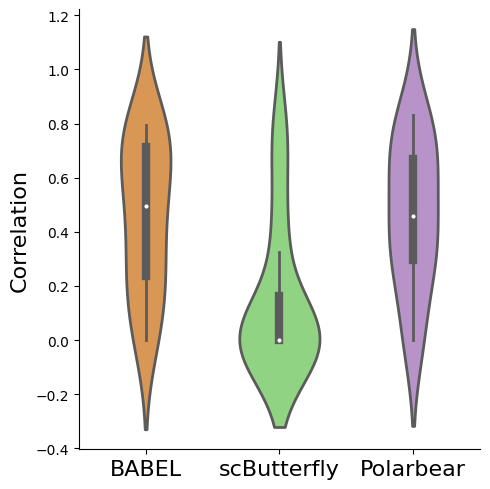

In [195]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=violon_df, palette=paired_colors, linewidth=2, ax=ax, fontsize=16, width=0.6, scale='area')

# Remove the box around the plot (hide the spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Optionally, keep only the left and bottom spines visible
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylabel('Correlation', fontsize=16)
ax.tick_params(axis='x', labelsize=16)

# Show the plot
plt.tight_layout()
plt.savefig('/workspace/Benchmarking/figures/violin_grcs_lymphoma.svg', format='svg', bbox_inches='tight')
plt.show()
# Save the violin plot


In [449]:
import anndata

In [455]:
babel_true = anndata.AnnData(auc_mtx_true_babel, dtype='float64')
babel_pred = anndata.AnnData(auc_mtx_pred_babel, dtype='float64')
babel_true_test = babel_true[babel_pred.obs_names].copy()
babel_pred.obs['Cell Types'] = pred_RNA_babel.obs['Cell Types']
babel_true_test.obs['Cell Types'] = pred_RNA_babel.obs['Cell Types']

sb_true = anndata.AnnData(auc_mtx_true_sb, dtype='float64')
sb_pred = anndata.AnnData(auc_mtx_pred_sb, dtype='float64')
sb_true_test = sb_true[sb_pred.obs_names].copy()
sb_pred.obs['Cell Types'] = pred_RNA_sb.obs['Cell Types']
sb_true_test.obs['Cell Types'] = pred_RNA_sb.obs['Cell Types']

polar_pred = anndata.AnnData(auc_mtx_polar, dtype='float64')
polar_pred.obs['Cell Types'] = pred_RNA_polar.obs['Cell Types']

In [456]:
babel_true_test.obs['group'] = babel_true_test.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
data_true = babel_true_test[babel_true_test.obs['group'].isin(['B','LYM'])].copy()

babel_pred.obs['group'] = babel_pred.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
data_babel_pred = babel_pred[babel_pred.obs['group'].isin(['B','LYM'])].copy()

sb_pred.obs['group'] = sb_pred.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
data_sb_pred = sb_pred[sb_pred.obs['group'].isin(['B','LYM'])].copy()

polar_pred.obs['group'] = polar_pred.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
data_polar_pred = polar_pred[polar_pred.obs['group'].isin(['B','LYM'])].copy()

sc.tl.rank_genes_groups(
    data_true,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)

sc.tl.rank_genes_groups(
    data_babel_pred,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)

sc.tl.rank_genes_groups(
    data_sb_pred,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)

sc.tl.rank_genes_groups(
    data_polar_pred,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)

de_true = sc.get.rank_genes_groups_df(data_true, group='LYM')
de_true['neg_log10_padj'] = -np.log10(de_true['pvals_adj'].replace(0, np.nan))

de_babel = sc.get.rank_genes_groups_df(data_babel_pred, group='LYM')
de_babel['neg_log10_padj'] = -np.log10(de_babel['pvals_adj'].replace(0, np.nan))

de_sb = sc.get.rank_genes_groups_df(data_sb_pred, group='LYM')
de_sb['neg_log10_padj'] = -np.log10(de_sb['pvals_adj'].replace(0, np.nan))

de_polar = sc.get.rank_genes_groups_df(data_polar_pred, group='LYM')
de_polar['neg_log10_padj'] = -np.log10(de_polar['pvals_adj'].replace(0, np.nan))

In [475]:
df1 = de_true
df2 = de_babel
df3 = de_sb
df4 = de_polar

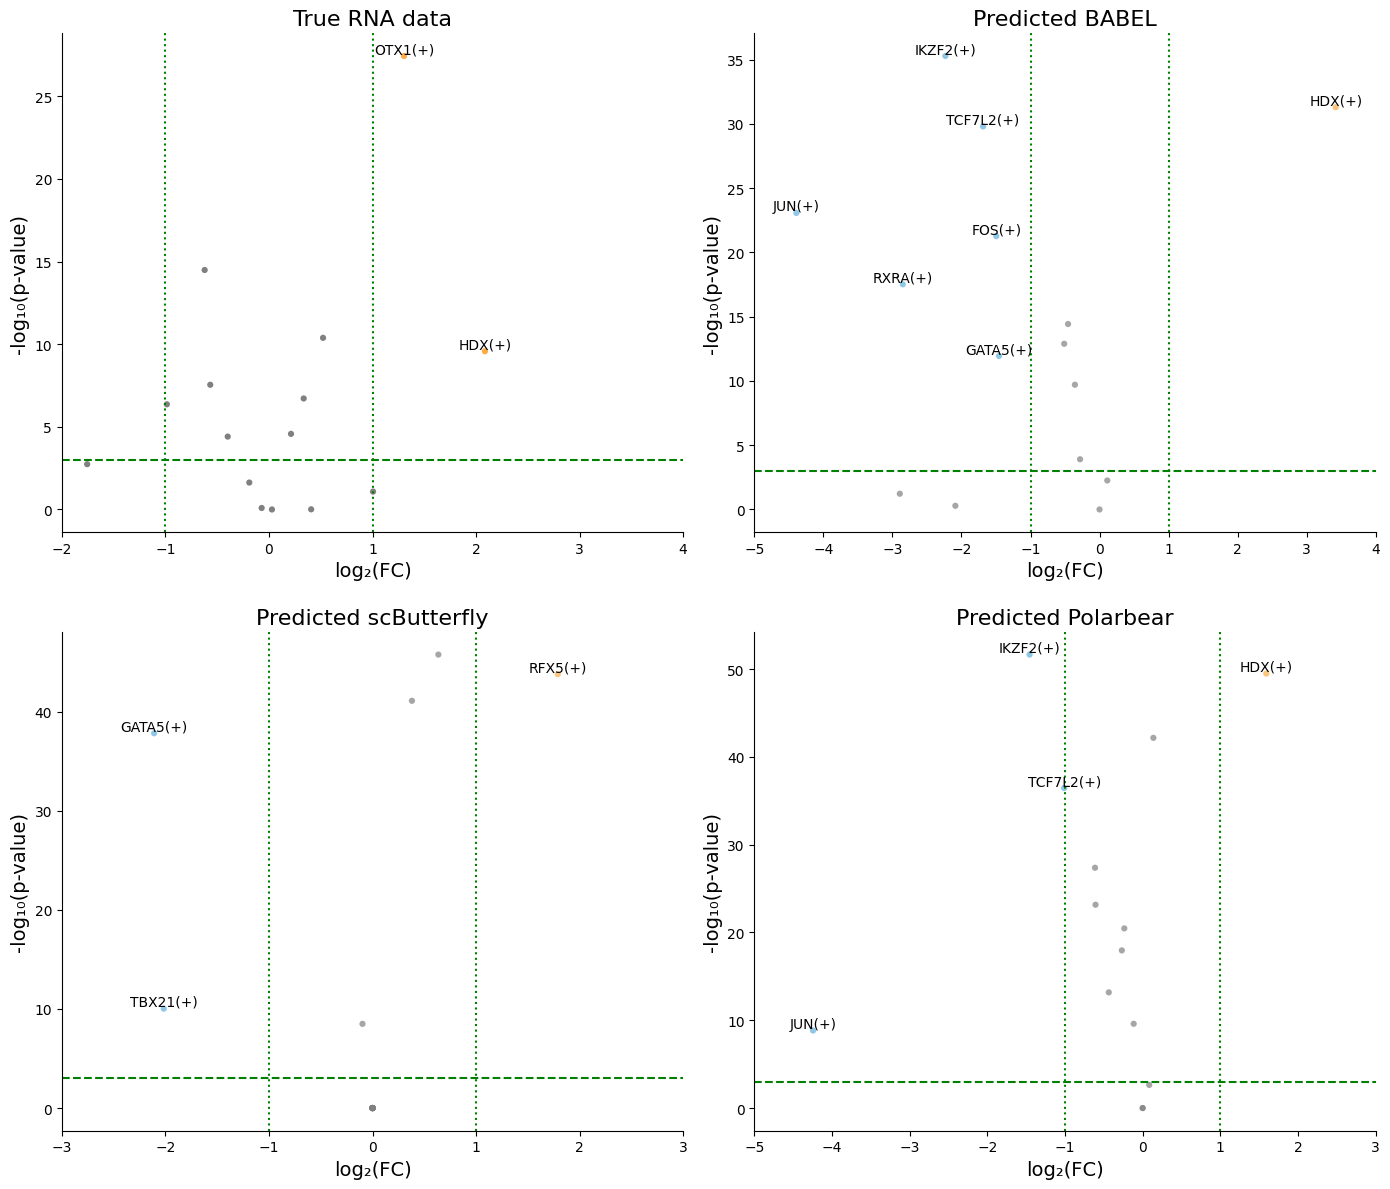

In [483]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Example dataframes df1, df2, df3, df4 (replace these with your actual dataframes)
axs = axes.flatten()
# Plot for df1
df1['color'] = 'grey'
df1.loc[(df1['logfoldchanges'] > 1) & (df1['pvals_adj'] < 0.001), 'color'] = '#fcad45'
df1.loc[(df1['logfoldchanges'] < -1) & (df1['pvals_adj'] < 0.001), 'color'] = '#60b1dd'

axes[0, 0].scatter(df1['logfoldchanges'], df1['neg_log10_padj'], s=20, alpha=1, c=df1['color'], edgecolor='none')
axes[0, 0].axhline(-np.log10(0.001), color='green', linestyle='--')
axes[0, 0].axvline(1, color='green', linestyle='dotted')
axes[0, 0].axvline(-1, color='green', linestyle='dotted')
axes[0, 0].set_xlim(-2, 4)
axes[0, 0].set_title('True RNA data', fontsize=16)
axes[0, 0].set_xlabel('log\u2082(FC)', fontsize=14)
axes[0, 0].set_ylabel('-log\u2081\u2080(p-value)', fontsize=14)

for _, row in df1.loc[((df1['logfoldchanges'] > 1) & (df1['pvals_adj'] < 0.001)) | ((df1['logfoldchanges'] < -1) & (df1['pvals_adj'] < 0.001)), :].iterrows():
    axes[0,0].text(row['logfoldchanges'], row['neg_log10_padj'],
             row['names'], fontsize=10, ha='center', va='bottom', color='black')

# Plot for df2
df2['color'] = 'grey'
df2.loc[(df2['logfoldchanges'] > 1) & (df2['pvals_adj'] < 0.001), 'color'] = '#fcad45'
df2.loc[(df2['logfoldchanges'] < -1) & (df2['pvals_adj'] < 0.001), 'color'] = '#60b1dd'

axes[0, 1].scatter(df2['logfoldchanges'], df2['neg_log10_padj'], s=20, alpha=0.7, c=df2['color'], edgecolor='none')
axes[0, 1].axhline(-np.log10(0.001), color='green', linestyle='--')
axes[0, 1].axvline(1, color='green', linestyle='dotted')
axes[0, 1].axvline(-1, color='green', linestyle='dotted')
axes[0, 1].set_xlim(-5, 4)
axes[0, 1].set_title('Predicted BABEL', fontsize=16)
axes[0, 1].set_xlabel('log\u2082(FC)', fontsize=14)
axes[0, 1].set_ylabel('-log\u2081\u2080(p-value)', fontsize=14)

for _, row in df2.loc[((df2['logfoldchanges'] > 1) & (df2['pvals_adj'] < 0.001)) | ((df2['logfoldchanges'] < -1) & (df2['pvals_adj'] < 0.001)), :].iterrows():
    axes[0,1].text(row['logfoldchanges'], row['neg_log10_padj'],
             row['names'], fontsize=10, ha='center', va='bottom', color='black')

# Plot for df3
df3['color'] = 'grey'
df3.loc[(df3['logfoldchanges'] > 1) & (df3['pvals_adj'] < 0.001), 'color'] = '#fcad45'
df3.loc[(df3['logfoldchanges'] < -1) & (df3['pvals_adj'] < 0.001), 'color'] = '#60b1dd'

axes[1, 0].scatter(df3['logfoldchanges'], df3['neg_log10_padj'], s=20, alpha=0.7, c=df3['color'], edgecolor='none')
axes[1, 0].axhline(-np.log10(0.001), color='green', linestyle='--')
axes[1, 0].axvline(1, color='green', linestyle='dotted')
axes[1, 0].axvline(-1, color='green', linestyle='dotted')
axes[1, 0].set_xlim(-3, 3)
axes[1, 0].set_title('Predicted scButterfly', fontsize=16)
axes[1, 0].set_xlabel('log\u2082(FC)', fontsize=14)
axes[1, 0].set_ylabel('-log\u2081\u2080(p-value)', fontsize=14)

for _, row in df3.loc[((df3['logfoldchanges'] > 1) & (df3['pvals_adj'] < 0.001)) | ((df3['logfoldchanges'] < -1) & (df3['pvals_adj'] < 0.001)), :].iterrows():
    axes[1,0].text(row['logfoldchanges'], row['neg_log10_padj'],
             row['names'], fontsize=10, ha='center', va='bottom', color='black')

# Plot for df4
df4['color'] = 'grey'
df4.loc[(df4['logfoldchanges'] > 1) & (df4['pvals_adj'] < 0.001), 'color'] = '#fcad45'
df4.loc[(df4['logfoldchanges'] < -1) & (df4['pvals_adj'] < 0.001), 'color'] = '#60b1dd'

axes[1, 1].scatter(df4['logfoldchanges'], df4['neg_log10_padj'], s=20, alpha=0.7, c=df4['color'], edgecolor='none')
axes[1, 1].axhline(-np.log10(0.001), color='green', linestyle='--')
axes[1, 1].axvline(1, color='green', linestyle='dotted')
axes[1, 1].axvline(-1, color='green', linestyle='dotted')
axes[1, 1].set_xlim(-5, 3)
axes[1, 1].set_title('Predicted Polarbear', fontsize=16)
axes[1, 1].set_xlabel('log\u2082(FC)', fontsize=14)
axes[1, 1].set_ylabel('-log\u2081\u2080(p-value)', fontsize=14)

for _, row in df4.loc[((df4['logfoldchanges'] > 1) & (df4['pvals_adj'] < 0.001)) | ((df4['logfoldchanges'] < -1) & (df4['pvals_adj'] < 0.001)), :].iterrows():
    axes[1,1].text(row['logfoldchanges'], row['neg_log10_padj'],
             row['names'], fontsize=10, ha='center', va='bottom', color='black')


for axis in axs:
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.subplots_adjust(hspace=0.2) 
plt.savefig('/workspace/Benchmarking/figures/grn_deg_lymphoma_.svg', format='svg', bbox_inches='tight')
plt.show()

In [134]:
def compute_deg(RNA_data, hv=False, plot=False):
    RNA_data.obs['group'] = RNA_data.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
        )
    data_gsea = RNA_data[RNA_data.obs['group'].isin(['B','LYM'])].copy()

    if hv is True:
        data_gsea = data_gsea[:, data_gsea.var['highly_variable']]

    sc.pp.log1p(data_gsea)
    sc.tl.rank_genes_groups(
    data_gsea,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
    )

    deg = sc.get.rank_genes_groups_df(data_gsea, group='LYM')
    deg['neg_log10_padj'] = -np.log10(deg['pvals_adj'].replace(0, np.nan))

    deg_list = deg[(deg["pvals_adj"] < 0.05) & (abs(deg["logfoldchanges"]) > 1)]['names'].tolist()

    enr = gp.enrichr(
    gene_list=deg_list,
    gene_sets='MSigDB_Hallmark_2020',  # or 'GO_Biological_Process_2021', 'Reactome_2022', etc.
    organism='Human',
    background=list(data_gsea.var_names),          
    outdir=None,     # optional
    cutoff=0.01                   # p-value cutoff
    )

    sig_enrichments = enr.results[enr.results['Adjusted P-value'] < 0.05]

    if plot is True:  
        df = deg.copy()  
        df['color'] = 'grey'
        df.loc[(df['logfoldchanges'] > 1) & (df['pvals_adj'] < 0.001), 'color'] = 'red'
        df.loc[(df['logfoldchanges'] < -1) & (df['pvals_adj'] < 0.001), 'color'] = 'blue'

        plt.figure(figsize=(7, 6))
        plt.scatter(df['logfoldchanges'], df['neg_log10_padj'], s=10, alpha=0.7, c=df['color'], edgecolor='none')
        plt.axhline(-np.log10(0.001), color='green', linestyle='--')
        plt.axvline(1, color='green', linestyle='dotted')
        plt.axvline(-1, color='green', linestyle='dotted')

        sig_df = df[df['pvals_adj'] < 0.001]
        top_up = sig_df.sort_values(by='logfoldchanges', ascending=False).head(10)
        top_down = sig_df.sort_values(by='logfoldchanges', ascending=True).head(10)

        for _, row in pd.concat([top_up, top_down]).iterrows():
            plt.text(row['logfoldchanges'], row['neg_log10_padj'],
                    row['names'], fontsize=7, ha='center', va='bottom', color='black')

        plt.xlabel('Log2 FC')
        plt.ylabel('-Log10 Adj_p')
        plt.title('Volcano Plot: Lymphoma B vs B Cells')
        plt.tight_layout()
        plt.savefig('my_plot.svg', format='svg')

    return sig_enrichments, deg

In [ ]:
deg_true = compute_deg(true_RNA)
deg_sb = compute_deg(pred_RNA_sb)
deg_babel = compute_deg(pred_RNA_babel)
deg_polar = compute_deg(pred_RNA_polar)
deg_true_test = compute_deg(true_RNA_sb)

/opt/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [489]:
df1 = deg_true[1]
df2 = deg_sb[1]
df3 = deg_babel[1]
df4 = deg_polar[1]
df5 = deg_true_test[1]

In [490]:
print(len(df1.loc[((df1['logfoldchanges'] > 1) & (df1['pvals_adj'] < 0.001)) | ((df1['logfoldchanges'] < -1) & (df1['pvals_adj'] < 0.001)), :]))
print(len(df2.loc[((df2['logfoldchanges'] > 1) & (df2['pvals_adj'] < 0.001)) | ((df2['logfoldchanges'] < -1) & (df2['pvals_adj'] < 0.001)), :]))
print(len(df3.loc[((df3['logfoldchanges'] > 1) & (df3['pvals_adj'] < 0.001)) | ((df3['logfoldchanges'] < -1) & (df3['pvals_adj'] < 0.001)), :]))
print(len(df4.loc[((df4['logfoldchanges'] > 1) & (df4['pvals_adj'] < 0.001)) | ((df4['logfoldchanges'] < -1) & (df4['pvals_adj'] < 0.001)), :]))
print(len(df5.loc[((df5['logfoldchanges'] > 1) & (df5['pvals_adj'] < 0.001)) | ((df5['logfoldchanges'] < -1) & (df5['pvals_adj'] < 0.001)), :]))

5198
951
8316
13426
1501


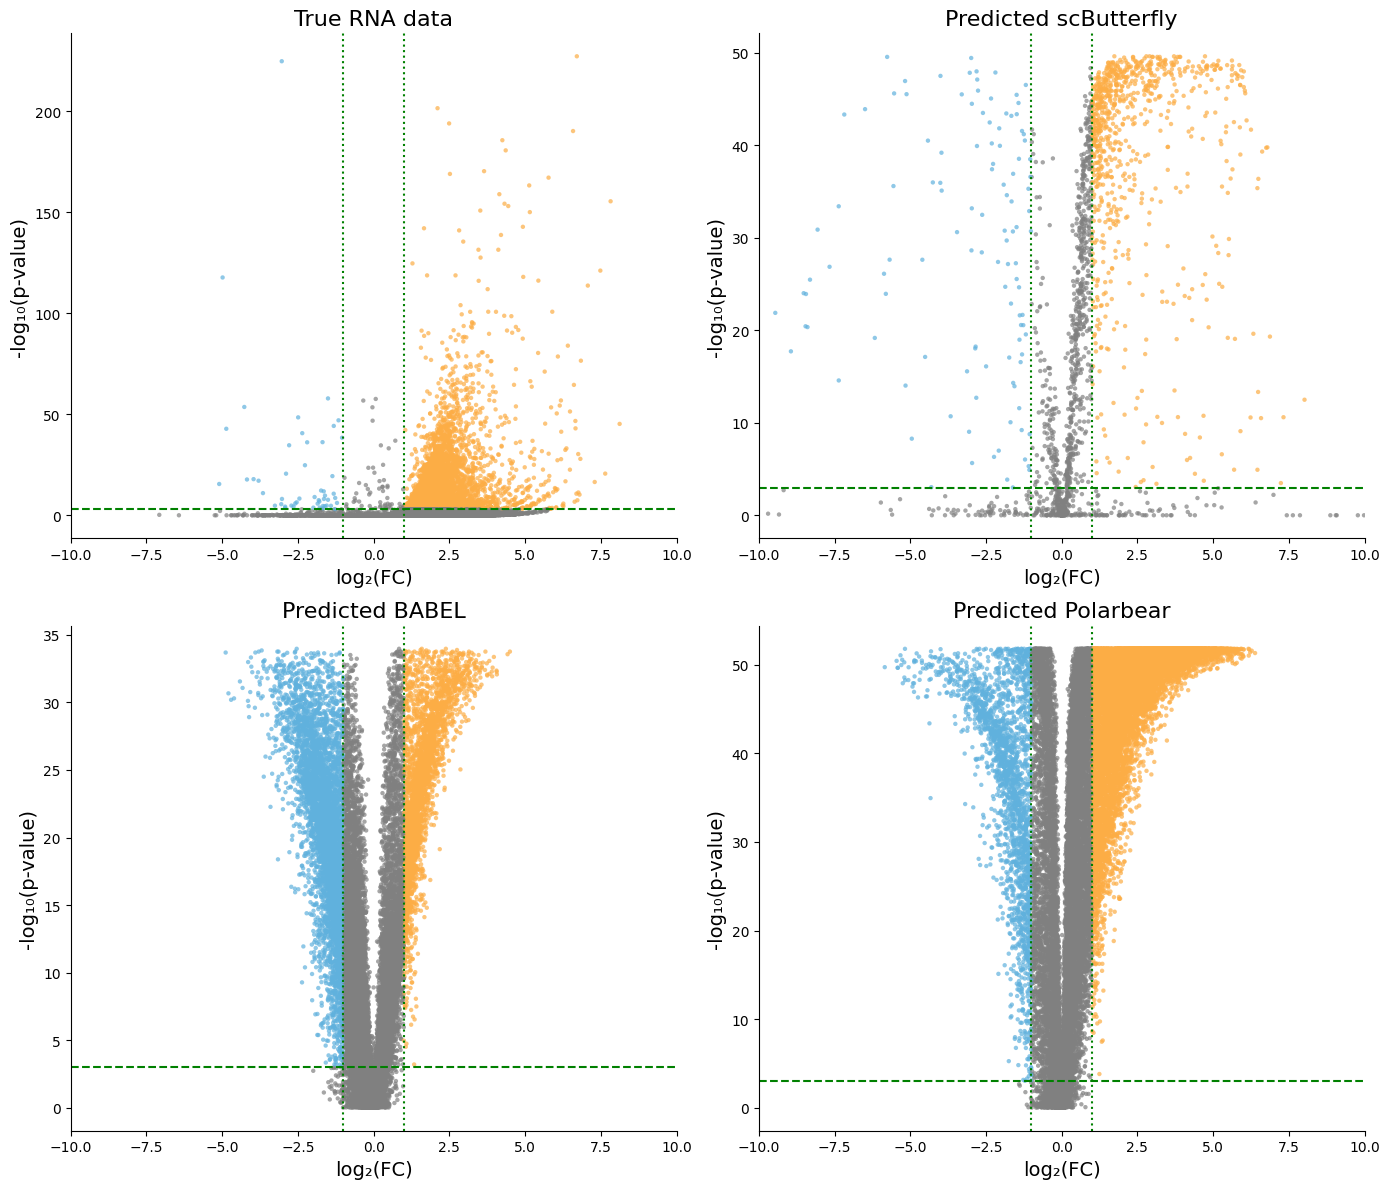

In [491]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have four dataframes: df1, df2, df3, df4

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Example dataframes df1, df2, df3, df4 (replace these with your actual dataframes)
axs = axes.flatten()
# Plot for df1
df1['color'] = 'grey'
df1.loc[(df1['logfoldchanges'] > 1) & (df1['pvals_adj'] < 0.001), 'color'] = '#fcad45'
df1.loc[(df1['logfoldchanges'] < -1) & (df1['pvals_adj'] < 0.001), 'color'] = '#60b1dd'

axes[0, 0].scatter(df1['logfoldchanges'], df1['neg_log10_padj'], s=10, alpha=0.7, c=df1['color'], edgecolor='none')
axes[0, 0].axhline(-np.log10(0.001), color='green', linestyle='--')
axes[0, 0].axvline(1, color='green', linestyle='dotted')
axes[0, 0].axvline(-1, color='green', linestyle='dotted')
axes[0, 0].set_xlim(-10, 10)
axes[0, 0].set_title('True RNA data', fontsize=16)
axes[0, 0].set_xlabel('log\u2082(FC)', fontsize=14)
axes[0, 0].set_ylabel('-log\u2081\u2080(p-value)', fontsize=14)

# Plot for df2
df2['color'] = 'grey'
df2.loc[(df2['logfoldchanges'] > 1) & (df2['pvals_adj'] < 0.001), 'color'] = '#fcad45'
df2.loc[(df2['logfoldchanges'] < -1) & (df2['pvals_adj'] < 0.001), 'color'] = '#60b1dd'

axes[0, 1].scatter(df2['logfoldchanges'], df2['neg_log10_padj'], s=10, alpha=0.7, c=df2['color'], edgecolor='none')
axes[0, 1].axhline(-np.log10(0.001), color='green', linestyle='--')
axes[0, 1].axvline(1, color='green', linestyle='dotted')
axes[0, 1].axvline(-1, color='green', linestyle='dotted')
axes[0, 1].set_xlim(-10, 10)
axes[0, 1].set_title('Predicted scButterfly', fontsize=16)
axes[0, 1].set_xlabel('log\u2082(FC)', fontsize=14)
axes[0, 1].set_ylabel('-log\u2081\u2080(p-value)', fontsize=14)

# Plot for df3
df3['color'] = 'grey'
df3.loc[(df3['logfoldchanges'] > 1) & (df3['pvals_adj'] < 0.001), 'color'] = '#fcad45'
df3.loc[(df3['logfoldchanges'] < -1) & (df3['pvals_adj'] < 0.001), 'color'] = '#60b1dd'

axes[1, 0].scatter(df3['logfoldchanges'], df3['neg_log10_padj'], s=10, alpha=0.7, c=df3['color'], edgecolor='none')
axes[1, 0].axhline(-np.log10(0.001), color='green', linestyle='--')
axes[1, 0].axvline(1, color='green', linestyle='dotted')
axes[1, 0].axvline(-1, color='green', linestyle='dotted')
axes[1, 0].set_xlim(-10, 10)
axes[1, 0].set_title('Predicted BABEL', fontsize=16)
axes[1, 0].set_xlabel('log\u2082(FC)', fontsize=14)
axes[1, 0].set_ylabel('-log\u2081\u2080(p-value)', fontsize=14)

# Plot for df4
df4['color'] = 'grey'
df4.loc[(df4['logfoldchanges'] > 1) & (df4['pvals_adj'] < 0.001), 'color'] = '#fcad45'
df4.loc[(df4['logfoldchanges'] < -1) & (df4['pvals_adj'] < 0.001), 'color'] = '#60b1dd'

axes[1, 1].scatter(df4['logfoldchanges'], df4['neg_log10_padj'], s=10, alpha=0.7, c=df4['color'], edgecolor='none')
axes[1, 1].axhline(-np.log10(0.001), color='green', linestyle='--')
axes[1, 1].axvline(1, color='green', linestyle='dotted')
axes[1, 1].axvline(-1, color='green', linestyle='dotted')
axes[1, 1].set_xlim(-10, 10)
axes[1, 1].set_title('Predicted Polarbear', fontsize=16)
axes[1, 1].set_xlabel('log\u2082(FC)', fontsize=14)
axes[1, 1].set_ylabel('-log\u2081\u2080(p-value)', fontsize=14)


for axis in axs:
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig('/workspace/Benchmarking/figures/deg_lymphoma.svg', format='svg', bbox_inches='tight')
plt.show()

In [492]:
def compute_pathway_overlap(sig_true, sig_pred):
# Identify common enriched terms
    shared_terms = set(sig_true['Term']).intersection(sig_pred['Term'])

    dict = {}
    jaccards = 0.0
    for term in shared_terms:
        # Get gene sets for the term from both dataframes
        genes_true = set(sig_true[sig_true['Term'] == term]['Genes'].values[0].split(';'))
        genes_pred = set(sig_pred[sig_pred['Term'] == term]['Genes'].values[0].split(';'))

        # Compute Jaccard index (overlap)
        union = genes_true.union(genes_pred)
        if len(union) == 0:
            continue  # avoid division by zero
        jaccard = len(genes_true.intersection(genes_pred)) / len(union)
        jaccards += jaccard
        fp = len(genes_pred - genes_true)
        fn = len(genes_true - genes_pred)
        dict[term] = {
            'Jaccard': jaccard,
            'FP': fp,
            'FN': fn,
        }

    if jaccards > 0:
        return jaccards / len(set(sig_true['Term'])), dict
    else:
        return 0.0, dict

In [493]:
shared_terms_babel = set(deg_true_test[0]['Term']).intersection(deg_babel[0]['Term'])
shared_terms_sb = set(deg_true_test[0]['Term']).intersection(deg_sb[0]['Term'])
shared_terms_polar = set(deg_true_test[0]['Term']).intersection(deg_polar[0]['Term'])
all_terms = shared_terms_babel.union(shared_terms_sb).union(shared_terms_polar)

In [494]:
pathways_polar = compute_pathway_overlap(deg_true_test[0], deg_polar[0])
pathways_babel = compute_pathway_overlap(deg_true_test[0], deg_babel[0])
pathways_sb = compute_pathway_overlap(deg_true_test[0], deg_sb[0])

In [495]:
pathways_babel

(0.024449529628075298,
 {'Hypoxia': {'Jaccard': 0.09090909090909091, 'FP': 53, 'FN': 17},
  'Interferon Gamma Response': {'Jaccard': 0.09649122807017543,
   'FP': 83,
   'FN': 20},
  'Allograft Rejection': {'Jaccard': 0.06956521739130435, 'FP': 76, 'FN': 31},
  'IL-2/STAT5 Signaling': {'Jaccard': 0.07, 'FP': 69, 'FN': 24},
  'IL-6/JAK/STAT3 Signaling': {'Jaccard': 0.07547169811320754,
   'FP': 38,
   'FN': 11},
  'TGF-beta Signaling': {'Jaccard': 0.075, 'FP': 17, 'FN': 20},
  'UV Response Dn': {'Jaccard': 0.05194805194805195, 'FP': 47, 'FN': 26},
  'KRAS Signaling Up': {'Jaccard': 0.038461538461538464, 'FP': 72, 'FN': 28},
  'TNF-alpha Signaling via NF-kB': {'Jaccard': 0.03571428571428571,
   'FP': 86,
   'FN': 22},
  'Estrogen Response Early': {'Jaccard': 0.11627906976744186,
   'FP': 61,
   'FN': 15},
  'Complement': {'Jaccard': 0.0380952380952381, 'FP': 74, 'FN': 27}})

In [496]:
pathways_sb

(0.001466275659824047,
 {'E2F Targets': {'Jaccard': 0.045454545454545456, 'FP': 17, 'FN': 46}})

In [497]:
pathways_polar

(0.0, {})

In [498]:
dict_data = {}
for i in all_terms:
    dict_data[i] = {
        'scButterfly': pathways_sb[1][i]['Jaccard'] if i in pathways_sb[1].keys() else 0.0,
        'BABEL': pathways_babel[1][i]['Jaccard'] if i in pathways_babel[1].keys() else 0.0,
    }

In [499]:
# Convert to DataFrame
df = pd.DataFrame.from_dict(dict_data, orient="index").reset_index()
df.columns = ["Pathway", "scButterfly", "Babel"]

# Optional: fill missing values with 0
df = df.fillna(0)

# Optional: sort by max value for aesthetics
df["Max"] = df[["scButterfly", "Babel"]].abs().max(axis=1)
df = df.sort_values("Max", ascending=True).drop(columns="Max")

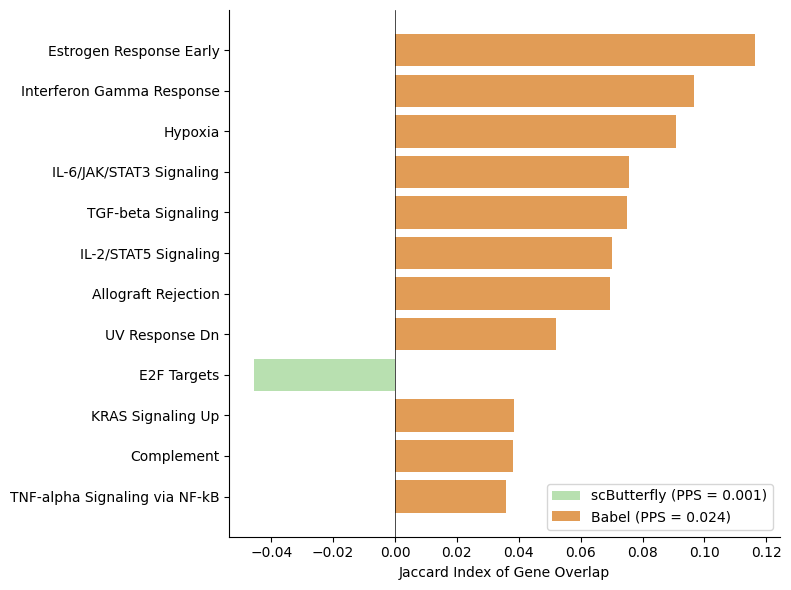

In [501]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot both bars
ax.barh(df["Pathway"], -df["scButterfly"], color="#b8e0b0", label="scButterfly (PPS = 0.001)")
ax.barh(df["Pathway"], df["Babel"], color="#e19c56", label="Babel (PPS = 0.024)")

# Add vertical center line
ax.axvline(0, color="black", linewidth=0.5)

# Axis labels and title
ax.set_xlabel("Jaccard Index of Gene Overlap")
ax.legend()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)



plt.tight_layout()
plt.show()

In [ ]:
paired_colors = [
    '#b2df8a',  # light green/ mono
    "#eba448",  # light orange/T cells
    '#ff7f00',  # orange/Mixed
    '#33a02c',  # green/dendritic
    "#b992cd",  # light purple/Tumour B cells
    '#6a3d9a',  # purple/ Fibroblasts
    '#fb9a99',  # light red/B cells
    "#60b1dd",  # light blue/Stromal
    '#1f78b4',  # blue
    '#e31a1c',  # red
    '#b15928',  # brown
]

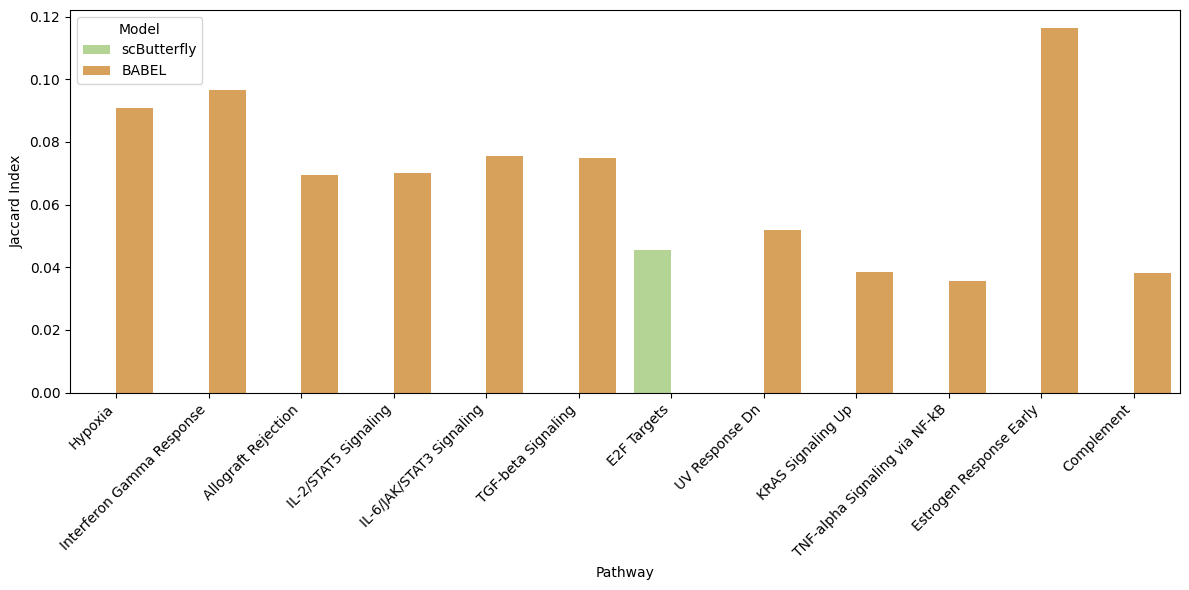

In [133]:
df = pd.DataFrame(dict_data).T.reset_index().melt(id_vars="index", var_name="Model", value_name="Jaccard Index")
df = df.rename(columns={"index": "Pathway"})

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Pathway", y="Jaccard Index", hue="Model", palette=paired_colors)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [167]:
deg_true_test[0]

Gene_set                           Term       P-value  \
0   MSigDB_Hallmark_2020                Mitotic Spindle  1.899830e-24   
1   MSigDB_Hallmark_2020              Protein Secretion  2.470379e-22   
2   MSigDB_Hallmark_2020                G2-M Checkpoint  3.158866e-21   
3   MSigDB_Hallmark_2020                 Myc Targets V1  2.240554e-20   
4   MSigDB_Hallmark_2020                    E2F Targets  5.998135e-13   
5   MSigDB_Hallmark_2020             TGF-beta Signaling  4.787242e-12   
6   MSigDB_Hallmark_2020       PI3K/AKT/mTOR  Signaling  1.701160e-11   
7   MSigDB_Hallmark_2020               mTORC1 Signaling  1.119457e-10   
8   MSigDB_Hallmark_2020                heme Metabolism  6.860414e-08   
9   MSigDB_Hallmark_2020            Allograft Rejection  9.135863e-08   
10  MSigDB_Hallmark_2020      Unfolded Protein Response  1.044438e-07   
11  MSigDB_Hallmark_2020                 UV Response Dn  9.726876e-07   
12  MSigDB_Hallmark_2020                     DNA Repair  1.968043e-05   
13  MSigDB_Hallmark_2020                      Apoptosis  2.225298e-05   
14  MSigDB_Hallmark_2020                     Glycolysis  4.743181e-05   
15  MSigDB_Hallmark_2020              KRAS Signaling Up  1.115438e-04   
16  MSigDB_Hallmark_2020      Interferon Gamma Response  2.311943e-04   
17  MSigDB_Hallmark_2020           IL-2/STAT5 Signaling  2.532727e-04   
18  MSigDB_Hallmark_2020                 UV Response Up  2.636656e-04   
19  MSigDB_Hallmark_2020                     Complement  2.772080e-04   
20  MSigDB_Hallmark_2020                    Pperoxisome  5.315559e-04   
21  MSigDB_Hallmark_2020              Androgen Response  7.800918e-04   
22  MSigDB_Hallmark_2020                   Adipogenesis  1.172151e-03   
23  MSigDB_Hallmark_2020       IL-6/JAK/STAT3 Signaling  3.518468e-03   
24  MSigDB_Hallmark_2020  TNF-alpha Signaling via NF-kB  9.383396e-03   
25  MSigDB_Hallmark_2020      Oxidative Phosphorylation  9.383396e-03   
26  MSigDB_Hallmark_2020                    p53 Pathway  1.339770e-02   
27  MSigDB_Hallmark_2020        Estrogen Response Early  1.691754e-02   
28  MSigDB_Hallmark_2020                 Apical Surface  2.158664e-02   
29  MSigDB_Hallmark_2020          Fatty Acid Metabolism  2.522634e-02   
30  MSigDB_Hallmark_2020                        Hypoxia  2.930502e-02   

    Adjusted P-value  Old P-value  Old adjusted P-value  Odds Ratio  \
0       9.499148e-23            0                     0    5.835873   
1       6.175948e-21            0                     0    9.487514   
2       5.264776e-20            0                     0    5.343981   
3       2.800692e-19            0                     0    5.176954   
4       5.998135e-12            0                     0    3.842688   
5       3.989368e-11            0                     0    8.621829   
6       1.215115e-10            0                     0    5.103523   
7       6.996607e-10            0                     0    3.431543   
8       3.811341e-07            0                     0    2.929337   
9       4.567932e-07            0                     0    2.891848   
10      4.747447e-07            0                     0    3.779615   
11      4.052865e-06            0                     0    3.057935   
12      7.569395e-05            0                     0    2.664439   
13      7.947492e-05            0                     0    2.590055   
14      1.581060e-04            0                     0    2.308849   
15      3.485742e-04            0                     0    2.224640   
16      6.799831e-04            0                     0    2.154374   
17      6.930199e-04            0                     0    2.141486   
18      6.930199e-04            0                     0    2.319710   
19      6.930199e-04            0                     0    2.128751   
20      1.265609e-03            0                     0    2.589826   
21      1.772936e-03            0                     0    2.574100   
22      2.548153e-03            0             

In [505]:
genes_true = set(deg_true_test[0][deg_true_test[0]['Term'] == 'Estrogen Response Early']['Genes'].values[0].split(';'))
genes_pred = set(deg_babel[0][deg_babel[0]['Term'] == 'Estrogen Response Early']['Genes'].values[0].split(';'))

In [169]:
from matplotlib_venn import venn2

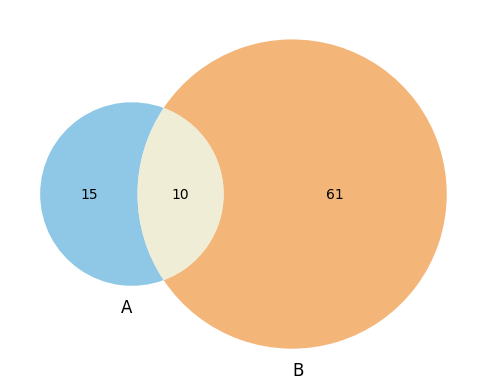

In [507]:
# Create the Venn diagram
venn2([genes_true, genes_pred], set_colors=('#60b1dd', '#ef973f'), alpha=0.7)
plt.savefig('/workspace/Benchmarking/figures/venn_e2f.svg', format='svg', bbox_inches='tight')
plt.show()



In [529]:
true_ATAC_sb

AnnData object with n_obs × n_vars = 2929 × 66372
    obs: 'Cell Types', 'group', 'Cell Type Plot'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
true_ATAC_babel.obs['group'] = true_ATAC_babel.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
true_atac_babel_data = true_ATAC_babel[true_ATAC_babel.obs['group'].isin(['B','LYM'])].copy()

sc.pp.log1p(true_atac_babel_data)

sc.tl.rank_genes_groups(
    true_atac_babel_data,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)

dap_true_babel = sc.get.rank_genes_groups_df(true_atac_babel_data, group='LYM')
dap_true_babel['neg_log10_padj'] = -np.log10(dap_true_babel['pvals_adj'].replace(0, np.nan))

pred_ATAC_babel.obs['group'] = pred_ATAC_babel.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
pred_atac_babel_data = pred_ATAC_babel[pred_ATAC_babel.obs['group'].isin(['B','LYM'])].copy()

sc.pp.log1p(pred_atac_babel_data)

sc.tl.rank_genes_groups(
    pred_atac_babel_data,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)

dap_pred_babel = sc.get.rank_genes_groups_df(pred_atac_babel_data, group='LYM')
dap_pred_babel['neg_log10_padj'] = -np.log10(dap_pred_babel['pvals_adj'].replace(0, np.nan))

true_ATAC_sb.obs['group'] = true_ATAC_sb.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
true_atac_sb_data = true_ATAC_sb[true_ATAC_sb.obs['group'].isin(['B','LYM'])].copy()

sc.pp.log1p(true_atac_sb_data)

sc.tl.rank_genes_groups(
    true_atac_sb_data,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)

dap_true_sb = sc.get.rank_genes_groups_df(true_atac_sb_data, group='LYM')
dap_true_sb['neg_log10_padj'] = -np.log10(dap_true_sb['pvals_adj'].replace(0, np.nan))

pred_ATAC_sb.obs['group'] = pred_ATAC_sb.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
pred_atac_sb_data = pred_ATAC_sb[pred_ATAC_sb.obs['group'].isin(['B','LYM'])].copy()

sc.pp.log1p(pred_atac_sb_data)

sc.tl.rank_genes_groups(
    pred_atac_sb_data,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)

dap_pred_sb = sc.get.rank_genes_groups_df(pred_atac_sb_data, group='LYM')
dap_pred_sb['neg_log10_padj'] = -np.log10(dap_pred_sb['pvals_adj'].replace(0, np.nan))

In [514]:
df.loc[(df['logfoldchanges'] > 1) & (df['pvals_adj'] < 0.001), :].shape[0]

3897

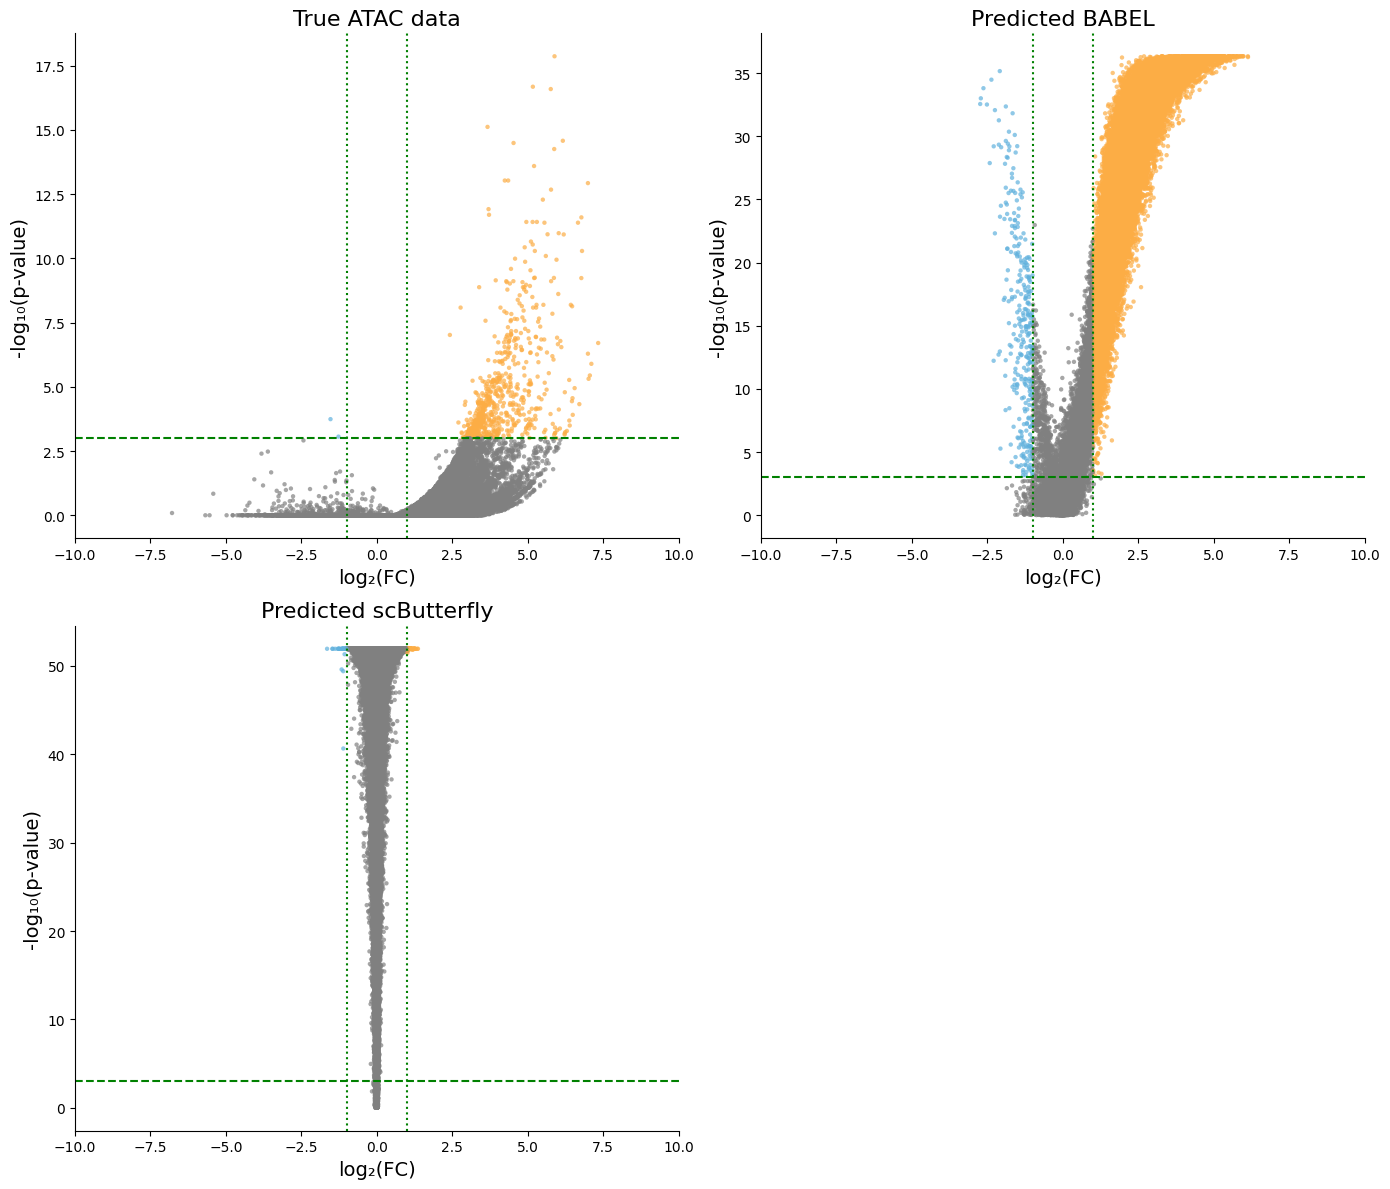

In [521]:
df = dap_true_babel.copy()
df2 = dap_pred_babel.copy()
df3 = dap_pred_sb.copy()
df4 = dap_true_babel.copy()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axs = axes.flatten()

df['color'] = 'grey'
df.loc[(df['logfoldchanges'] > 1) & (df['pvals_adj'] < 0.001), 'color'] = '#fcad45'
df.loc[(df['logfoldchanges'] < -1) & (df['pvals_adj'] < 0.001), 'color'] = '#60b1dd'

axes[0, 0].scatter(df['logfoldchanges'], df['neg_log10_padj'], s=10, alpha=0.7, c=df['color'], edgecolor='none')
axes[0, 0].axhline(-np.log10(0.001), color='green', linestyle='--')
axes[0, 0].axvline(1, color='green', linestyle='dotted')
axes[0, 0].axvline(-1, color='green', linestyle='dotted')
axes[0, 0].set_xlim(-10, 10)
axes[0, 0].set_title('True ATAC data', fontsize=16)
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].set_xlabel('log\u2082(FC)', fontsize=14)
axes[0, 0].set_ylabel('-log\u2081\u2080(p-value)', fontsize=14)

df2['color'] = 'grey'
df2.loc[(df2['logfoldchanges'] > 1) & (df2['pvals_adj'] < 0.001), 'color'] = '#fcad45'
df2.loc[(df2['logfoldchanges'] < -1) & (df2['pvals_adj'] < 0.001), 'color'] = '#60b1dd'

axes[0,1].scatter(df2['logfoldchanges'], df2['neg_log10_padj'], s=10, alpha=0.7, c=df2['color'], edgecolor='none')
axes[0,1].axhline(-np.log10(0.001), color='green', linestyle='--')
axes[0,1].axvline(1, color='green', linestyle='dotted')
axes[0,1].axvline(-1, color='green', linestyle='dotted')
axes[0,1].set_xlim(-10, 10)
axes[0,1].set_title('Predicted BABEL', fontsize=16)
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].set_xlabel('log\u2082(FC)', fontsize=14)
axes[0, 1].set_ylabel('-log\u2081\u2080(p-value)', fontsize=14)

df3['color'] = 'grey'
df3.loc[(df3['logfoldchanges'] > 1) & (df3['pvals_adj'] < 0.001), 'color'] = '#fcad45'
df3.loc[(df3['logfoldchanges'] < -1) & (df3['pvals_adj'] < 0.001), 'color'] = '#60b1dd'
axes[1,0].scatter(df3['logfoldchanges'], df3['neg_log10_padj'], s=10, alpha=0.7, c=df3['color'], edgecolor='none')
axes[1,0].axhline(-np.log10(0.001), color='green', linestyle='--')
axes[1,0].axvline(1, color='green', linestyle='dotted')
axes[1,0].axvline(-1, color='green', linestyle='dotted')
axes[1,0].set_xlim(-10, 10)
axes[1,0].set_title('Predicted scButterfly', fontsize=16)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)
axes[1, 0].set_xlabel('log\u2082(FC)', fontsize=14)
axes[1, 0].set_ylabel('-log\u2081\u2080(p-value)', fontsize=14)

axes[1,1].axis('off')
# df4['color'] = 'grey'
# df4.loc[(df4['logfoldchanges'] > 1) & (df4['pvals_adj'] < 0.001), 'color'] = '#fcad45'
# df4.loc[(df4['logfoldchanges'] < -1) & (df4['pvals_adj'] < 0.001), 'color'] = '#60b1dd'
# axes[1,1].scatter(df4['logfoldchanges'], df4['neg_log10_padj'], s=10, alpha=0.7, c=df4['color'], edgecolor='none')
# axes[1,1].axhline(-np.log10(0.001), color='green', linestyle='--')
# axes[1,1].axvline(1, color='green', linestyle='dotted')
# axes[1,1].axvline(-1, color='green', linestyle='dotted')
# axes[1,1].set_xlim(-10, 10)
# axes[1,1].set_title('Predicted scButterfly', fontsize=16)
# axes[1,1].spines['top'].set_visible(False)
# axes[1,1].spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('/workspace/Benchmarking/figures/dap_lymphoma.svg', format='svg', bbox_inches='tight')
plt.show()


In [516]:
dap_list_true_babel= set(dap_true_babel[(dap_true_babel["pvals_adj"] < 0.05) & (abs(dap_true_babel["logfoldchanges"]) > 1)]['names'].tolist())
dap_list_pred_babel = set(dap_pred_babel[(dap_pred_babel["pvals_adj"] < 0.05) & (abs(dap_pred_babel["logfoldchanges"]) > 1)]['names'].tolist())
dap_list_pred_sb = set(dap_pred_sb[(dap_pred_sb["pvals_adj"] < 0.05) & (abs(dap_pred_sb["logfoldchanges"]) > 1)]['names'].tolist())
dap_list_true_sb = set(dap_true_sb[(dap_true_sb["pvals_adj"] < 0.05) & (abs(dap_true_sb["logfoldchanges"]) > 1)]['names'].tolist())

In [517]:
jaccard_babel = len(dap_list_true_babel.intersection(dap_list_pred_babel))/len(dap_list_true_babel.union(dap_list_pred_babel))
jaccard_sb = len(dap_list_true_babel.intersection(dap_list_pred_sb))/len(dap_list_true_babel.union(dap_list_pred_sb))

In [518]:
print(jaccard_sb, jaccard_babel)

0.023167358229598894 0.0022159682673344116


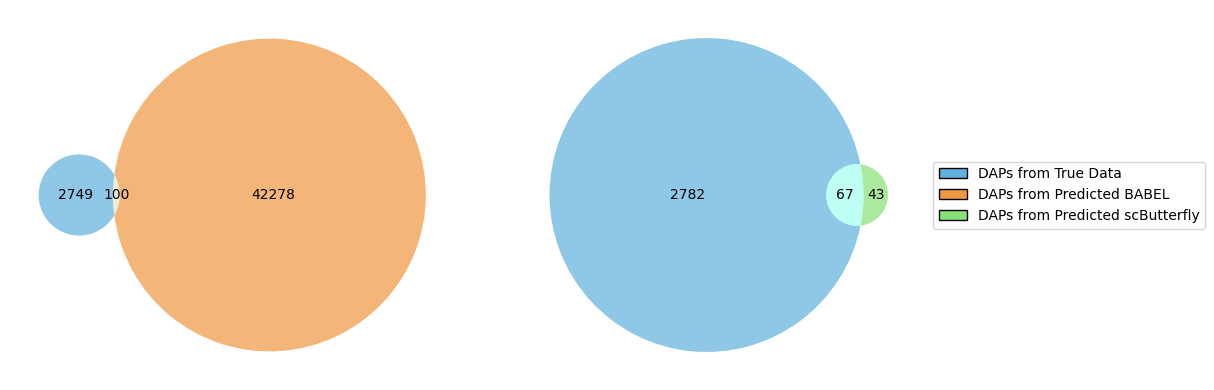

In [ ]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from matplotlib.patches import Patch
# Example data (replace with your lists)
# dap_list_true_sb, dap_list_pred_babel, dap_list_pred_sb = [...]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Venn 1: True vs Babel
venn1 = venn2([dap_list_true_babel, dap_list_pred_babel],
              set_labels=('DAPs from True Data', 'DAPs from Predicted BABEL'),
              set_colors=('#60b1dd', '#ef973f'),
              alpha=0.7,
              ax=axs[0])

# Venn 2: True vs scButterfly
venn2_plot = venn2([dap_list_true_babel, dap_list_pred_sb],
                   set_labels=('DAPs from True Data', 'DAPs from Predicted scButterfly'),
                   set_colors=('#60b1dd', "#87e175"),
                   alpha=0.7,
                   ax=axs[1])

# Improve label positioning if needed
for venn in [venn1, venn2_plot]:
    for text in venn.set_labels:
        if text:
            text.set_visible(False)

legend_elements = [
    Patch(facecolor='#60b1dd', edgecolor='black', label='DAPs from True Data'),
    Patch(facecolor='#ef973f', edgecolor='black', label='DAPs from Predicted BABEL'),
    Patch(facecolor='#87e175', edgecolor='black', label='DAPs from Predicted scButterfly')
]

plt.tight_layout()
plt.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)

plt.savefig("/workspace/Benchmarking/figures/venn_dap_comparison.svg", format="svg", bbox_inches='tight')
plt.show()


In [281]:
import sklearn.metrics as metrics

In [ ]:
pred_RNA_sb_c = pred_RNA_sb[~pred_RNA_sb.obs['Cell Types'].isna()].copy()
pred_ATAC_sb_c = pred_ATAC_sb[~pred_ATAC_sb.obs['Cell Types'].isna()].copy()
pred_RNA_babel_c = pred_RNA_babel[~pred_RNA_babel.obs['Cell Types'].isna()].copy()
pred_ATAC_babel_c = pred_ATAC_babel[~pred_ATAC_babel.obs['Cell Types'].isna()].copy()
pred_RNA_polar_c = pred_RNA_polar[~pred_RNA_polar.obs['Cell Types'].isna()].copy()

sc.tl.leiden(pred_RNA_sb_c, resolution=0.5, key_added='leiden_0.5')
sc.tl.leiden(pred_ATAC_babel_c, resolution=0.5, key_added='leiden_0.5')
sc.tl.leiden(pred_ATAC_sb_c, resolution=0.5, key_added='leiden_0.5')
sc.tl.leiden(pred_RNA_babel_c, resolution=0.5, key_added='leiden_0.5')
sc.tl.leiden(pred_RNA_polar_c, resolution=0.5, key_added='leiden_0.5')

In [311]:
#RNA sb
ARI = metrics.adjusted_rand_score(pred_RNA_sb_c.obs['Cell Types'], pred_RNA_sb_c.obs['leiden_0.5'])
AMI = metrics.adjusted_mutual_info_score(pred_RNA_sb_c.obs['Cell Types'], pred_RNA_sb_c.obs['leiden_0.5'])
NMI = metrics.normalized_mutual_info_score(pred_RNA_sb_c.obs['Cell Types'], pred_RNA_sb_c.obs['leiden_0.5'])
HOM = metrics.homogeneity_score(pred_RNA_sb_c.obs['Cell Types'], pred_RNA_sb_c.obs['leiden_0.5'])
print('RNA_sb: ARI: %.3f, \tAMI: %.3f, \tNMI: %.3f, \tHOM: %.3f' % (ARI, AMI, NMI, HOM))

#ATAC sb
ARI = metrics.adjusted_rand_score(pred_ATAC_sb_c.obs['Cell Types'], pred_ATAC_sb_c.obs['leiden_0.5'])
AMI = metrics.adjusted_mutual_info_score(pred_ATAC_sb_c.obs['Cell Types'], pred_ATAC_sb_c.obs['leiden_0.5'])
NMI = metrics.normalized_mutual_info_score(pred_ATAC_sb_c.obs['Cell Types'], pred_ATAC_sb_c.obs['leiden_0.5'])
HOM = metrics.homogeneity_score(pred_ATAC_sb_c.obs['Cell Types'], pred_ATAC_sb_c.obs['leiden_0.5'])
print('ATAC_sb: ARI: %.3f, \tAMI: %.3f, \tNMI: %.3f, \tHOM: %.3f' % (ARI, AMI, NMI, HOM))

#RNA babel
ARI = metrics.adjusted_rand_score(pred_RNA_babel_c.obs['Cell Types'], pred_RNA_babel_c.obs['leiden_0.5'])
AMI = metrics.adjusted_mutual_info_score(pred_RNA_babel_c.obs['Cell Types'], pred_RNA_babel_c.obs['leiden_0.5'])
NMI = metrics.normalized_mutual_info_score(pred_RNA_babel_c.obs['Cell Types'], pred_RNA_babel_c.obs['leiden_0.5'])
HOM = metrics.homogeneity_score(pred_RNA_babel_c.obs['Cell Types'], pred_RNA_babel_c.obs['leiden_0.5'])
print('RNA_babel: ARI: %.3f, \tAMI: %.3f, \tNMI: %.3f, \tHOM: %.3f' % (ARI, AMI, NMI, HOM))

#ATAC babel
ARI = metrics.adjusted_rand_score(pred_ATAC_babel_c.obs['Cell Types'], pred_ATAC_babel_c.obs['leiden_0.5'])
AMI = metrics.adjusted_mutual_info_score(pred_ATAC_babel_c.obs['Cell Types'], pred_ATAC_babel_c.obs['leiden_0.5'])
NMI = metrics.normalized_mutual_info_score(pred_ATAC_babel_c.obs['Cell Types'], pred_ATAC_babel_c.obs['leiden_0.5'])
HOM = metrics.homogeneity_score(pred_ATAC_babel_c.obs['Cell Types'], pred_ATAC_babel_c.obs['leiden_0.5'])
print('ATAC_babel: ARI: %.3f, \tAMI: %.3f, \tNMI: %.3f, \tHOM: %.3f' % (ARI, AMI, NMI, HOM))

#RNA polar
ARI = metrics.adjusted_rand_score(pred_RNA_polar_c.obs['Cell Types'], pred_RNA_polar_c.obs['leiden_0.5'])
AMI = metrics.adjusted_mutual_info_score(pred_RNA_polar_c.obs['Cell Types'], pred_RNA_polar_c.obs['leiden_0.5'])
NMI = metrics.normalized_mutual_info_score(pred_RNA_polar_c.obs['Cell Types'], pred_RNA_polar_c.obs['leiden_0.5'])
HOM = metrics.homogeneity_score(pred_RNA_polar_c.obs['Cell Types'], pred_RNA_polar_c.obs['leiden_0.5'])
print('RNA_polar: ARI: %.3f, \tAMI: %.3f, \tNMI: %.3f, \tHOM: %.3f' % (ARI, AMI, NMI, HOM))




RNA_sb: ARI: 0.249, 	AMI: 0.429, 	NMI: 0.436, 	HOM: 0.515
ATAC_sb: ARI: 0.241, 	AMI: 0.502, 	NMI: 0.508, 	HOM: 0.611
RNA_babel: ARI: 0.346, 	AMI: 0.453, 	NMI: 0.458, 	HOM: 0.465
ATAC_babel: ARI: 0.206, 	AMI: 0.454, 	NMI: 0.463, 	HOM: 0.559
RNA_polar: ARI: 0.211, 	AMI: 0.416, 	NMI: 0.423, 	HOM: 0.512


In [317]:
pred_RNA_bmmc_sb_c = pred_RNA_bmmc_sb[~pred_RNA_bmmc_sb.obs['cell_type'].isna()].copy()
pred_ATAC_bmmc_sb_c = pred_ATAC_bmmc_sb[~pred_ATAC_bmmc_sb.obs['cell_type'].isna()].copy()
pred_RNA_bmmc_polar_c = pred_RNA_bmmc_polar[~pred_RNA_bmmc_polar.obs['cell_type'].isna()].copy()

sc.tl.leiden(pred_ATAC_bmmc_sb_c, resolution=0.5, key_added='leiden_0.5')
sc.tl.leiden(pred_RNA_bmmc_polar_c, resolution=0.5, key_added='leiden_0.5')
sc.tl.leiden(pred_RNA_bmmc_sb_c, resolution=0.5, key_added='leiden_0.5')

In [320]:
#RNA sb
ARI = metrics.adjusted_rand_score(pred_RNA_bmmc_sb_c.obs['cell_type'], pred_RNA_bmmc_sb_c.obs['leiden_0.5'])
AMI = metrics.adjusted_mutual_info_score(pred_RNA_bmmc_sb_c.obs['cell_type'], pred_RNA_bmmc_sb_c.obs['leiden_0.5'])
NMI = metrics.normalized_mutual_info_score(pred_RNA_bmmc_sb_c.obs['cell_type'], pred_RNA_bmmc_sb_c.obs['leiden_0.5'])
HOM = metrics.homogeneity_score(pred_RNA_bmmc_sb_c.obs['cell_type'], pred_RNA_bmmc_sb_c.obs['leiden_0.5'])
print('RNA_sb: ARI: %.3f, \tAMI: %.3f, \tNMI: %.3f, \tHOM: %.3f' % (ARI, AMI, NMI, HOM))

#ATAC sb
ARI = metrics.adjusted_rand_score(pred_ATAC_bmmc_sb_c.obs['cell_type'], pred_ATAC_bmmc_sb_c.obs['leiden_0.5'])
AMI = metrics.adjusted_mutual_info_score(pred_ATAC_bmmc_sb_c.obs['cell_type'], pred_ATAC_bmmc_sb_c.obs['leiden_0.5'])
NMI = metrics.normalized_mutual_info_score(pred_ATAC_bmmc_sb_c.obs['cell_type'], pred_ATAC_bmmc_sb_c.obs['leiden_0.5'])
HOM = metrics.homogeneity_score(pred_ATAC_bmmc_sb_c.obs['cell_type'], pred_ATAC_bmmc_sb_c.obs['leiden_0.5'])
print('ATAC_sb: ARI: %.3f, \tAMI: %.3f, \tNMI: %.3f, \tHOM: %.3f' % (ARI, AMI, NMI, HOM))

#RNA polar
ARI = metrics.adjusted_rand_score(pred_RNA_bmmc_polar_c.obs['cell_type'], pred_RNA_bmmc_polar_c.obs['leiden_0.5'])
AMI = metrics.adjusted_mutual_info_score(pred_RNA_bmmc_polar_c.obs['cell_type'], pred_RNA_bmmc_polar_c.obs['leiden_0.5'])
NMI = metrics.normalized_mutual_info_score(pred_RNA_bmmc_polar_c.obs['cell_type'], pred_RNA_bmmc_polar_c.obs['leiden_0.5'])
HOM = metrics.homogeneity_score(pred_RNA_bmmc_polar_c.obs['cell_type'], pred_RNA_bmmc_polar_c.obs['leiden_0.5'])
print('RNA_babel: ARI: %.3f, \tAMI: %.3f, \tNMI: %.3f, \tHOM: %.3f' % (ARI, AMI, NMI, HOM))

RNA_sb: ARI: 0.499, 	AMI: 0.678, 	NMI: 0.682, 	HOM: 0.657
ATAC_sb: ARI: 0.590, 	AMI: 0.709, 	NMI: 0.713, 	HOM: 0.707
RNA_babel: ARI: 0.000, 	AMI: 0.001, 	NMI: 0.007, 	HOM: 0.006


In [527]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import episcanpy.preprocessing as epi_pp
import episcanpy.tools as epi_tl

In [569]:
true_ATAC_bmmc_test.var

feature_types gene_id
chr1-9776-10668                  ATAC     NaN
chr1-180726-181005               ATAC     NaN
chr1-181117-181803               ATAC     NaN
chr1-191133-192055               ATAC     NaN
chr1-629497-630394               ATAC     NaN
...                               ...     ...
GL000219.1-90062-90937           ATAC     NaN
GL000219.1-99257-100160          ATAC     NaN
KI270726.1-27152-28034           ATAC     NaN
KI270713.1-21434-22336           ATAC     NaN
KI270713.1-29629-30491           ATAC     NaN

[101095 rows x 2 columns]

In [ ]:
true_ATAC_bmmc_test.var_names = true_ATAC_bmmc_test.var_names.str.replace(r'^([^:]+?)-', r'\1:', regex=True)
pred_ATAC_bmmc_sb.var_names = pred_ATAC_bmmc_sb.var_names.str.replace(r'^([^:]+?)-', r'\1:', regex=True)


In [ ]:
gene_activity_true = epi_tl.geneactivity(true_ATAC_sb, gtf_file='/workspace/Benchmarking/data_all/gencode.v48.annotation.gtf', feature_type='gene', key_added='gene_activity')
gene_activity_pred_babel = epi_tl.geneactivity(pred_ATAC_babel, gtf_file='/workspace/Benchmarking/data_all/gencode.v48.annotation.gtf', feature_type='gene', key_added='gene_activity')
gene_activity_pred_sb = epi_tl.geneactivity(pred_ATAC_sb, gtf_file='/workspace/Benchmarking/data_all/gencode.v48.annotation.gtf', feature_type='gene', key_added='gene_activity')
gene_activity_true_bmmc = epi_tl.geneactivity(true_ATAC_bmmc_test, gtf_file='/workspace/Benchmarking/data_all/gencode.v48.annotation.gtf', feature_type='gene', key_added='gene_activity')
gene_activity_pred_bmmc_sb = epi_tl.geneactivity(pred_ATAC_bmmc_sb, gtf_file='/workspace/Benchmarking/data_all/gencode.v48.annotation.gtf', feature_type='gene', key_added='gene_activity')

In [573]:
sc.pp.normalize_total(gene_activity_true, target_sum=1e6)
sc.pp.log1p(gene_activity_true)
sc.pp.highly_variable_genes(gene_activity_true, n_top_genes=3000)

sc.pp.normalize_total(gene_activity_pred_babel, target_sum=1e6)
sc.pp.log1p(gene_activity_pred_babel)
sc.pp.highly_variable_genes(gene_activity_pred_babel, n_top_genes=3000)

sc.pp.normalize_total(gene_activity_pred_sb, target_sum=1e6)
sc.pp.log1p(gene_activity_pred_sb)
sc.pp.highly_variable_genes(gene_activity_pred_sb, n_top_genes=3000)

sc.pp.normalize_total(gene_activity_true_bmmc, target_sum=1e6)
sc.pp.log1p(gene_activity_true_bmmc)
sc.pp.highly_variable_genes(gene_activity_true_bmmc, n_top_genes=3000)

sc.pp.normalize_total(gene_activity_pred_bmmc_sb, target_sum=1e6)
sc.pp.log1p(gene_activity_pred_bmmc_sb)
sc.pp.highly_variable_genes(gene_activity_pred_bmmc_sb, n_top_genes=3000)

In [548]:
hvg_true = set(gene_activity_true[:,gene_activity_true.var['highly_variable']].var_names)
hvg_pred_babel = set(gene_activity_pred_babel[:,gene_activity_pred_babel.var['highly_variable']].var_names)
hvg_pred_sb = set(gene_activity_pred_sb[:,gene_activity_pred_sb.var['highly_variable']].var_names)
hvg_rna = set(true_RNA_sb[:,true_RNA_sb.var['highly_variable']].var_names)

In [574]:
hvg_true_bmmc = set(gene_activity_true_bmmc[:,gene_activity_true_bmmc.var['highly_variable']].var_names)
hvg_pred_bmmc_sb = set(gene_activity_pred_bmmc_sb[:,gene_activity_pred_bmmc_sb.var['highly_variable']].var_names)
hvg_rna_bmmc = set(true_RNA_bmmc_test[:,true_RNA_bmmc_test.var['highly_variable']].var_names)

In [555]:
jaccard_true = len(hvg_rna.intersection(hvg_true))/len(hvg_rna.union(hvg_true))
jaccard_babel = len(hvg_rna.intersection(hvg_pred_babel))/len(hvg_rna.union(hvg_pred_babel))
jaccard_sb = len(hvg_rna.intersection(hvg_pred_sb))/len(hvg_rna.union(hvg_pred_sb))
print(jaccard_true)
print(jaccard_babel)
print(jaccard_sb)

0.02832618025751073
0.030412371134020618
0.03132530120481928


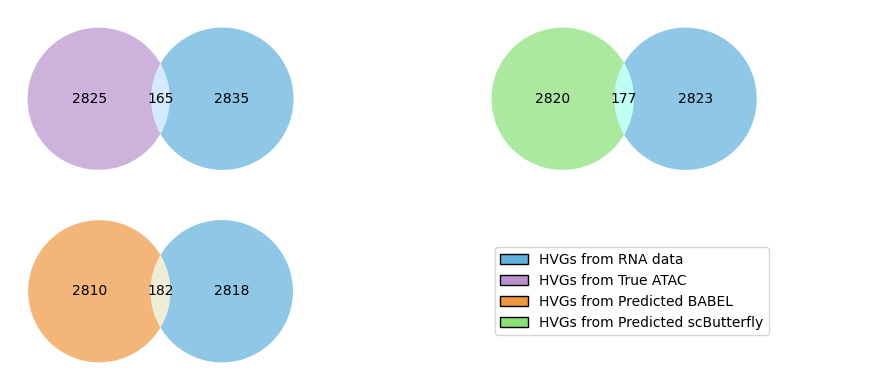

In [563]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from matplotlib.patches import Patch
fig, axs = plt.subplots(2, 2, figsize=(10, 4))

axs = axs.flatten()

# Venn 1: True vs Babel
venn1 = venn2([hvg_true, hvg_rna],
              set_labels=('DAPs from True Data', 'DAPs from Predicted BABEL'),
              set_colors=('#b992cd', '#60b1dd'),
              alpha=0.7,
              ax=axs[0])

# Venn 2: True vs scButterfly
venn2_plot = venn2([hvg_pred_babel, hvg_rna],
                   set_labels=('DAPs from True Data', 'DAPs from Predicted scButterfly'),
                   set_colors=("#87e175", '#60b1dd'),
                   alpha=0.7,
                   ax=axs[1])

venn3_plot = venn2([hvg_pred_sb, hvg_rna],
                   set_labels=('HVGs from True Data', 'HVGs from Predicted BABEL'),
                   set_colors=('#ef973f', '#60b1dd'),
                   alpha=0.7,
                   ax=axs[2])
 
axs[3].axis('off')  # Hide the last subplot
# Improve label positioning if needed
for venn in [venn1, venn2_plot, venn3_plot]:
    for text in venn.set_labels:
        if text:
            text.set_visible(False)

legend_elements = [ 
        Patch(facecolor='#60b1dd', edgecolor='black', label='HVGs from RNA data'),
    Patch(facecolor='#b992cd', edgecolor='black', label='HVGs from True ATAC'),
    Patch(facecolor='#ef973f', edgecolor='black', label='HVGs from Predicted BABEL'),
    Patch(facecolor='#87e175', edgecolor='black', label='HVGs from Predicted scButterfly')
]

plt.tight_layout()
plt.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(0.8, 0.5), ncol=1)

plt.savefig("/workspace/Benchmarking/figures/venn_gacs.svg", format="svg", bbox_inches='tight')
plt.show()

In [557]:
gacs_babel = abs(jaccard_true - jaccard_babel)/jaccard_true
gacs_sb = abs(jaccard_true - jaccard_sb)/jaccard_true
print(gacs_babel)
print(gacs_sb)

0.0736488597313339
0.10587805768528663


In [575]:
jaccard_true_bmmc = len(hvg_rna_bmmc.intersection(hvg_true_bmmc))/len(hvg_rna_bmmc.union(hvg_true_bmmc))
jaccard_sb_bmmc = len(hvg_rna_bmmc.intersection(hvg_pred_bmmc_sb))/len(hvg_rna_bmmc.union(hvg_pred_bmmc_sb))
print(jaccard_true_bmmc)
print(jaccard_sb_bmmc)

0.034369602763385146
0.08544532947139753


In [586]:
abs(jaccard_true_bmmc - jaccard_sb_bmmc)/jaccard_true_bmmc

1.4860726514542297